# Construindo imagens Ground Truth

In [9]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from PIL import Image
import numpy as np
import math

# Read GT data
data = loadmat("../VIS_Onboard/HorizonGT/MVI_0790_VIS_OB_HorizonGT")

# Get the number of frames
#frames_number = len(data['structXML'][0])

## Exibindo a linha do horizonte para  imagem

Este código exemplifica como imprimir a linha do horizonte em uma imagem a partir dos dados do arquivo GT.

A linha GT do horizonte é traçada como uma linha reta, com seu ponto central em (x, y). Para determinar sua inclinação encontre o ângulo corresondente à cos alpha ou sen de alpha.

Para realizar a transformação de rotação na linha do horizonte deve-se converter as coordenadas, aplicar a transformação e somá-la à transformação atual da imagem.

(array([[960.5]]), array([[466.36252683]]), array([[0.02444696]]), array([[0.99970113]]))


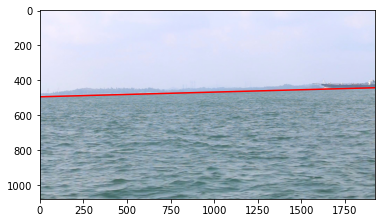

In [10]:
# ==== Draw horizon line for the image ====
# Read de base image
frame_number = 0
im = np.array(Image.open("../VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]
print(horizon)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create horizon line
line = plt.axhline(y=horizon[1], color='r', linestyle='-')

# Convert coordinates
ts = ax.transData
coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

# -- Rotate line --
# Rotate the line around x, y in alpha degrees
t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
line.set_transform(line.get_transform() + t)

plt.show()

## Gerando imagens GT

Essa seção traz dois exemplo: como gera o GT para uma imagem e como gerar para todas as imagens do arquivo GT. O arquivo GT ainda deve ser especificado para os dois casos (na primeira célula de código).



### Gera GT frame 0
Gera a imagem GT para um único frame. O frame deve ser especificado.

Uma imagem base é usada para se saber as dimensões com que a imagem GT deve ser criada.

Uma matriz com as mesmas dimensões da imagem base é criada para representar a imagem GT, em que 1 representa os pixels que constituem a linha do horizonte e 0 os que não constituem.

Ao se criar a figura que será plotada deve-se passar suas dimensões em polegadas e deve ser exibida em escalas de cinza.

dimensões da matriz: 1080 x 1920
dimensões da matriz em polegada: 11.250000036000001 x 20.000000064


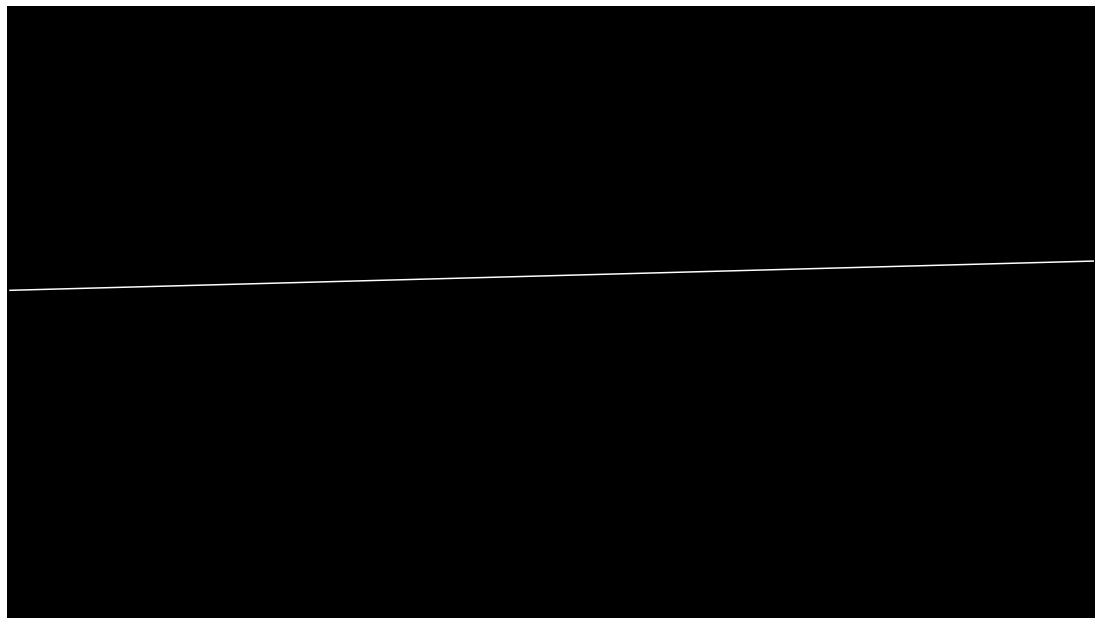

In [11]:
# Read de base image
frame_number = 0
im = np.array(Image.open("../VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame" + str(frame_number) + ".jpg"), dtype=np.uint8)

# Get image dimension
len_x, len_y = len(im), len(im[0])
print("dimensões da matriz: " + str(len_x) + ' x ' + str(len_y))

# Create Gt matrix image
gt = np.zeros((len_x, len_y), dtype=np.uint8)

# Dimension in inches
lenp_x, lenp_y = len_x * 0.0104166667, len_y * 0.0104166667
print("dimensões da matriz em polegada: " + str(lenp_x) + ' x ' + str(lenp_y))
# Create figure and axes
fig,ax = plt.subplots(figsize=(lenp_y, lenp_x))

# Display the image with gray scale
ax.imshow(gt, cmap='gray')

# Create the horizon line
line = plt.axhline(y=horizon[1], color='w', linestyle='-')

# horizon = data frame <frame_number> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
horizon = data['structXML'][0][frame_number]
# Convert coordinates
ts = ax.transData
coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

# Rotate line
# Rotate the line around x, y in alpha degrees
t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
line.set_transform(line.get_transform() + t)

# Disable axis print
plt.axis("off")

plt.show()

# Save the image wihout padding
fig.savefig('GTimage.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)

### Gera GT de todos os frames

Gera as imagens GT para um todos frames do arquivo GT. Segue os mesmos parâmetros da seção acima.

(array([[960.5]]), array([[466.36252683]]), array([[0.02444696]]), array([[0.99970113]]))


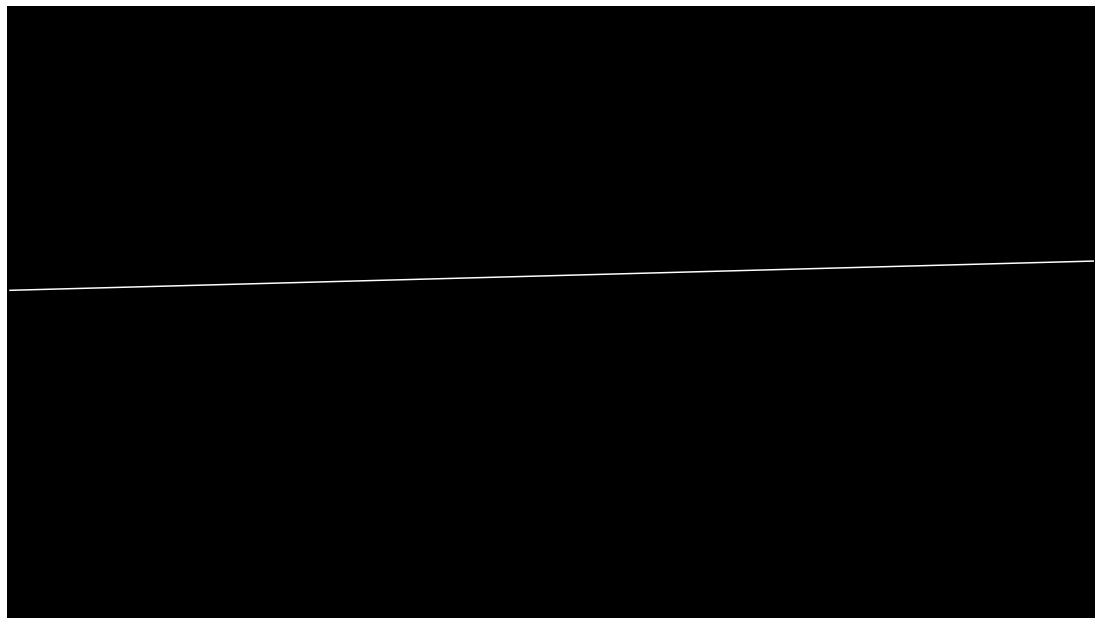

(array([[961]], dtype=uint16), array([[463.55002142]]), array([[0.02443214]]), array([[0.99970149]]))


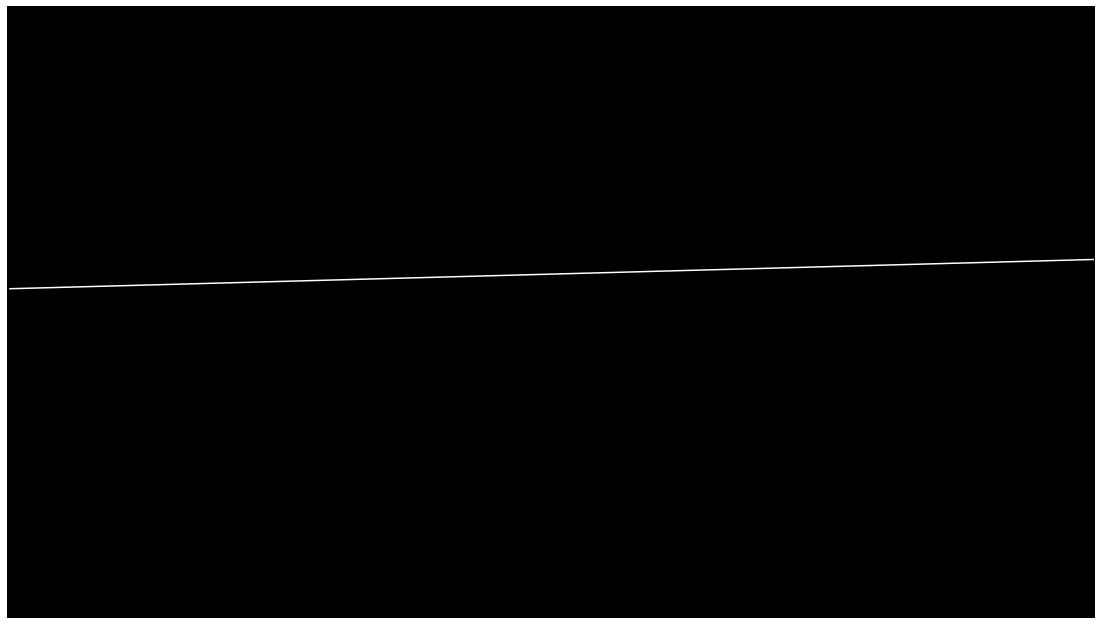

(array([[961]], dtype=uint16), array([[463.13924333]]), array([[0.02792168]]), array([[0.99961011]]))


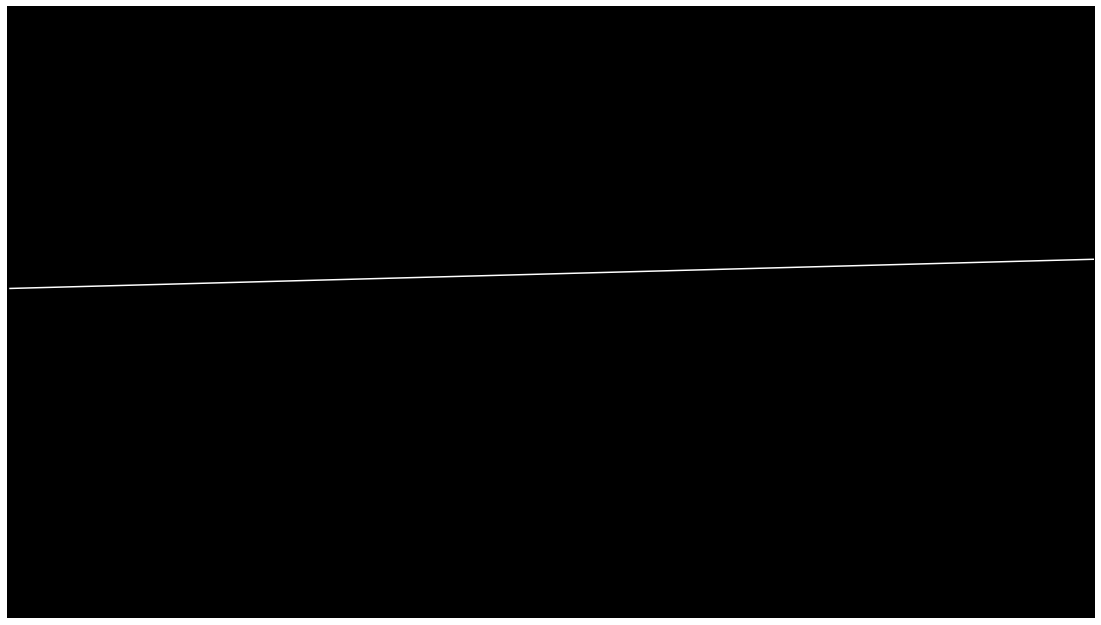

(array([[961]], dtype=uint16), array([[463.05263105]]), array([[0.02714626]]), array([[0.99963147]]))


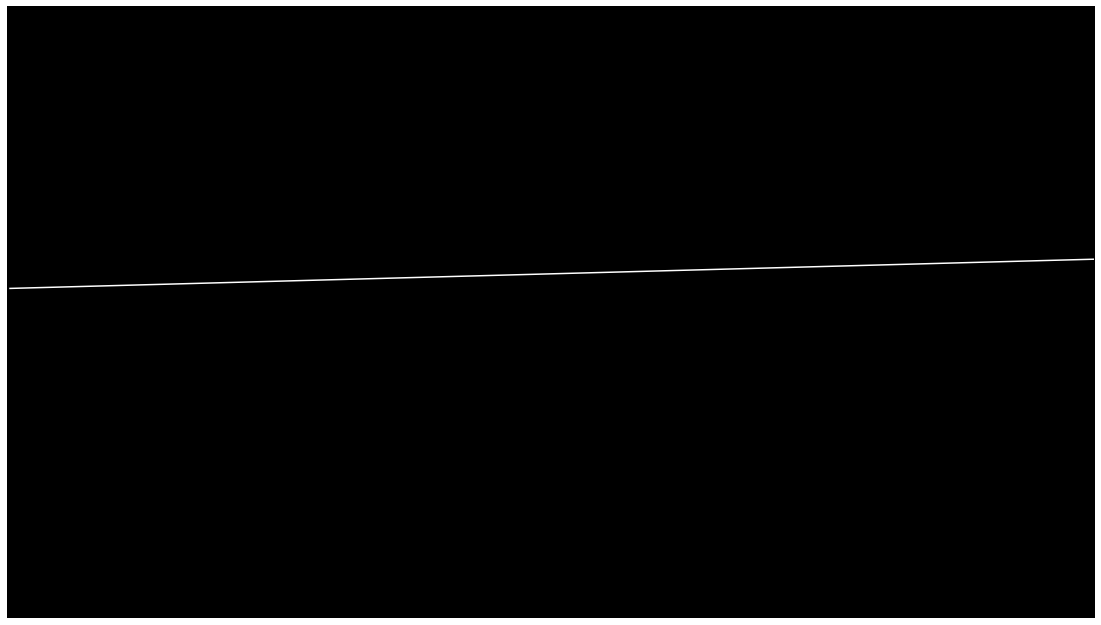

(array([[961]], dtype=uint16), array([[463.18799131]]), array([[0.02835785]]), array([[0.99959784]]))


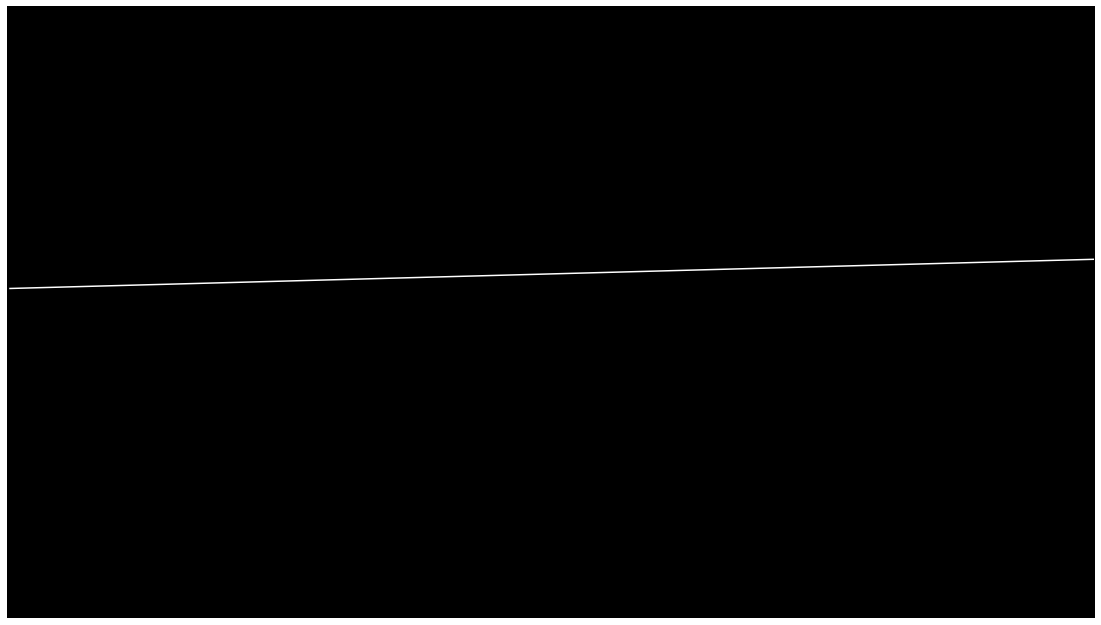

(array([[961]], dtype=uint16), array([[465.20898143]]), array([[0.03365362]]), array([[0.99943356]]))


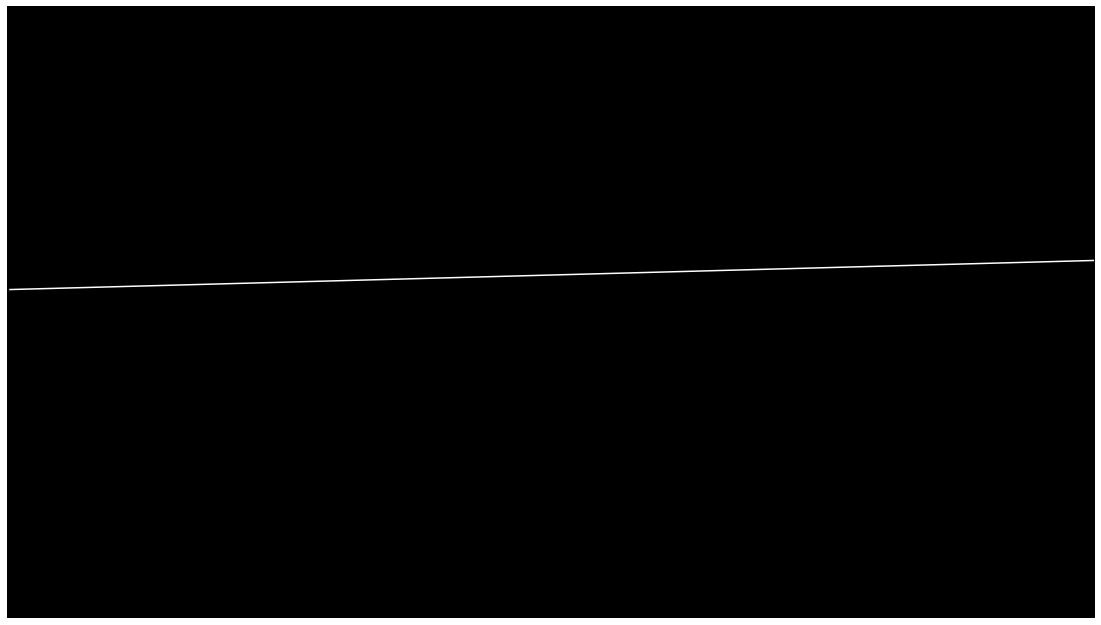

(array([[960.5]]), array([[463.66955851]]), array([[0.03143128]]), array([[0.99950592]]))


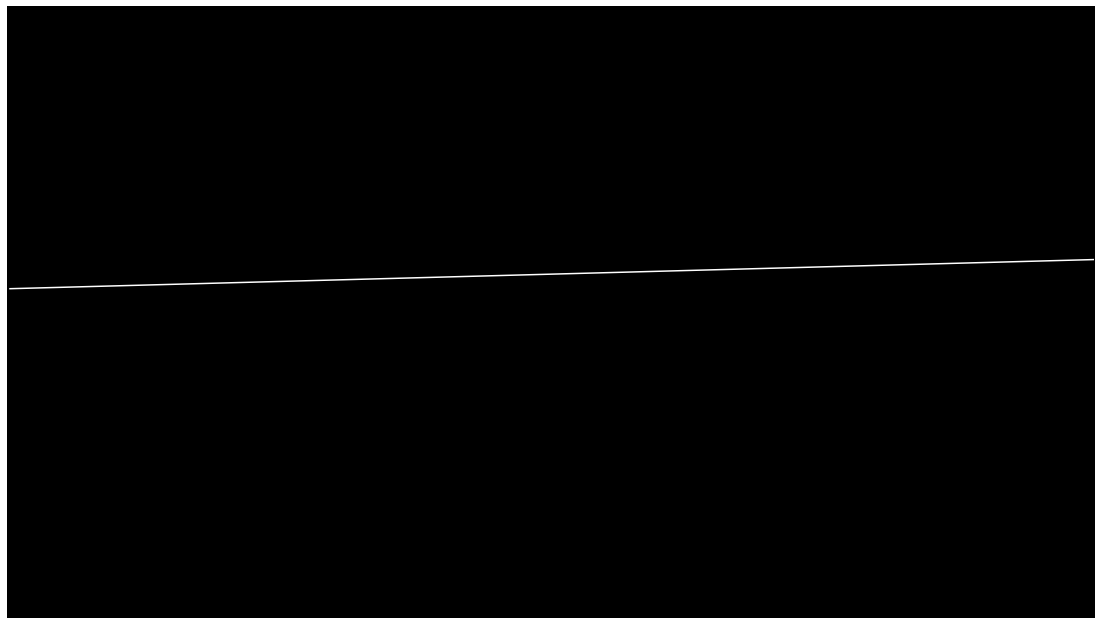

(array([[961]], dtype=uint16), array([[468.17134443]]), array([[0.0348995]]), array([[0.99939083]]))


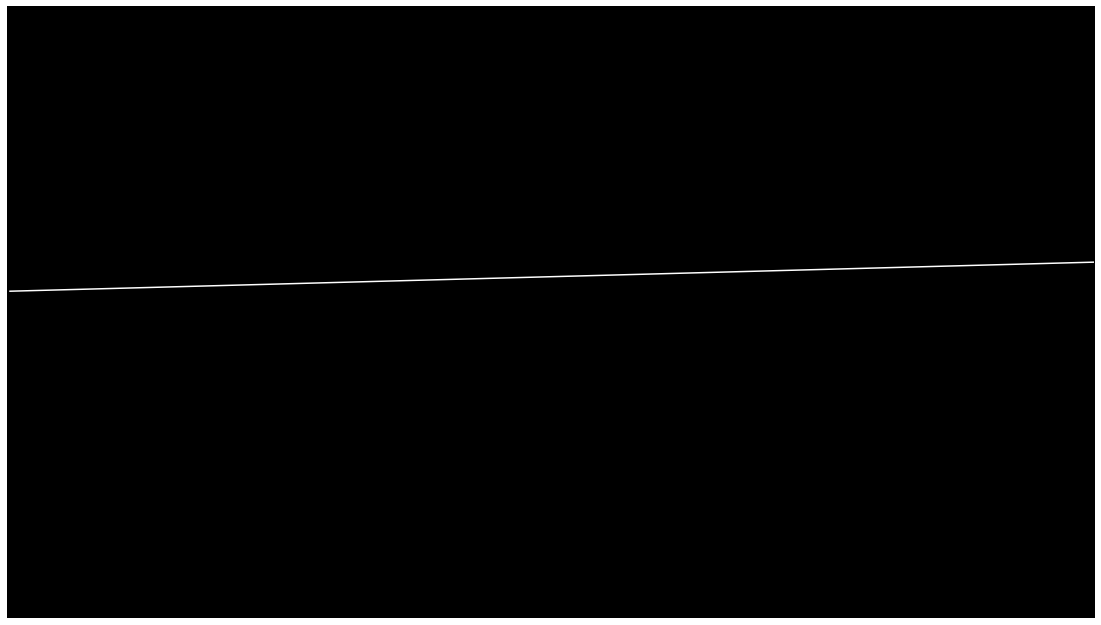

(array([[961]], dtype=uint16), array([[468.92180159]]), array([[0.0348995]]), array([[0.99939083]]))


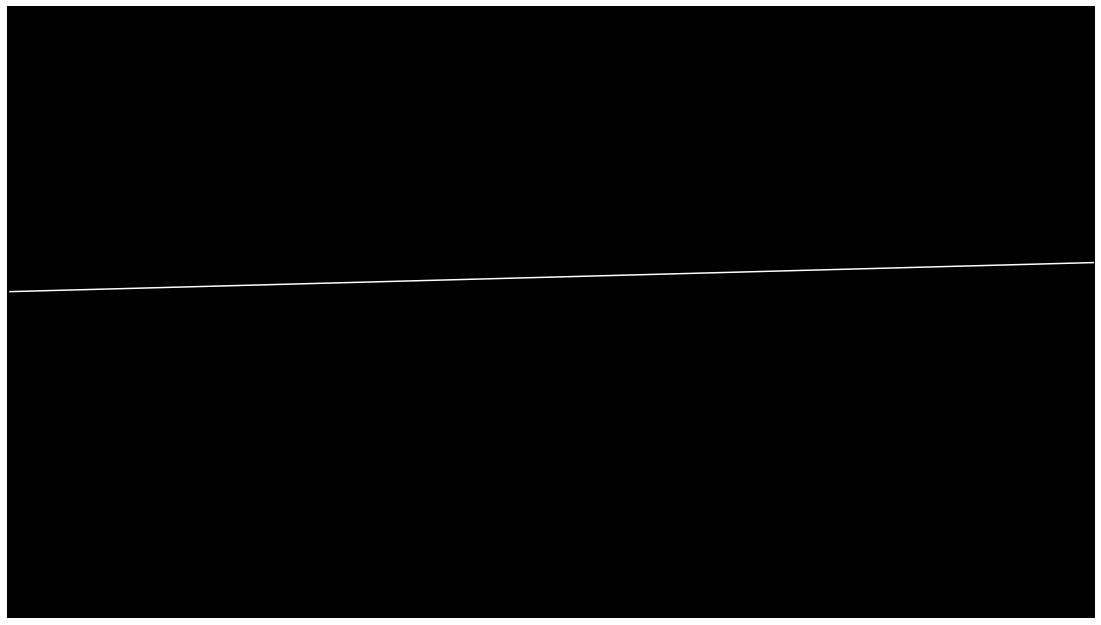

(array([[961]], dtype=uint16), array([[472.92423976]]), array([[0.0348995]]), array([[0.99939083]]))


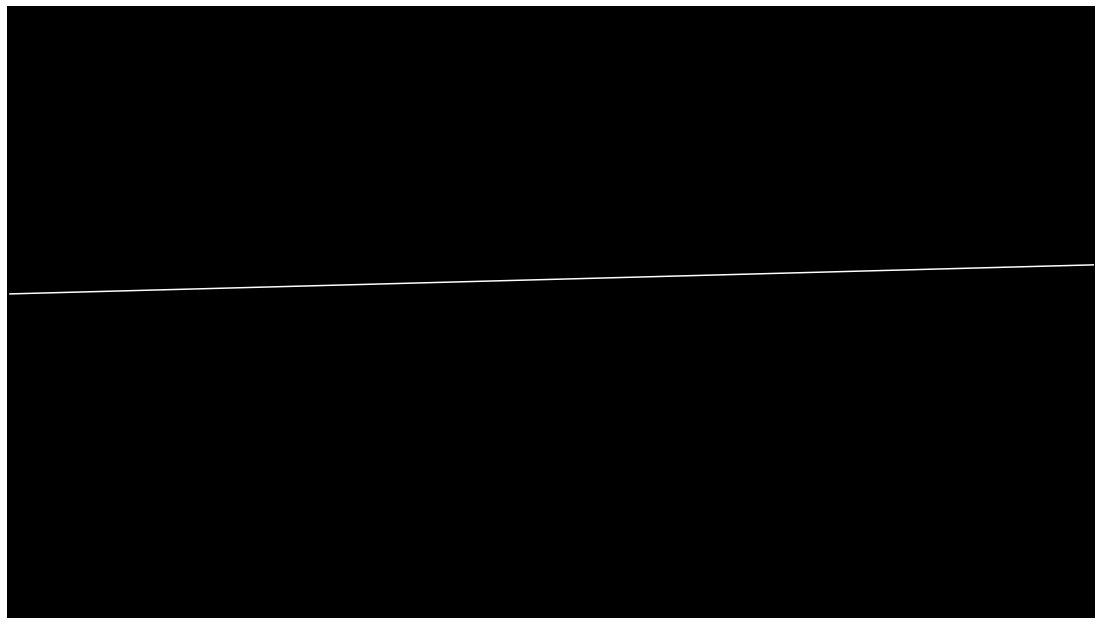

(array([[960.5]]), array([[472.18300158]]), array([[0.03372448]]), array([[0.99943117]]))


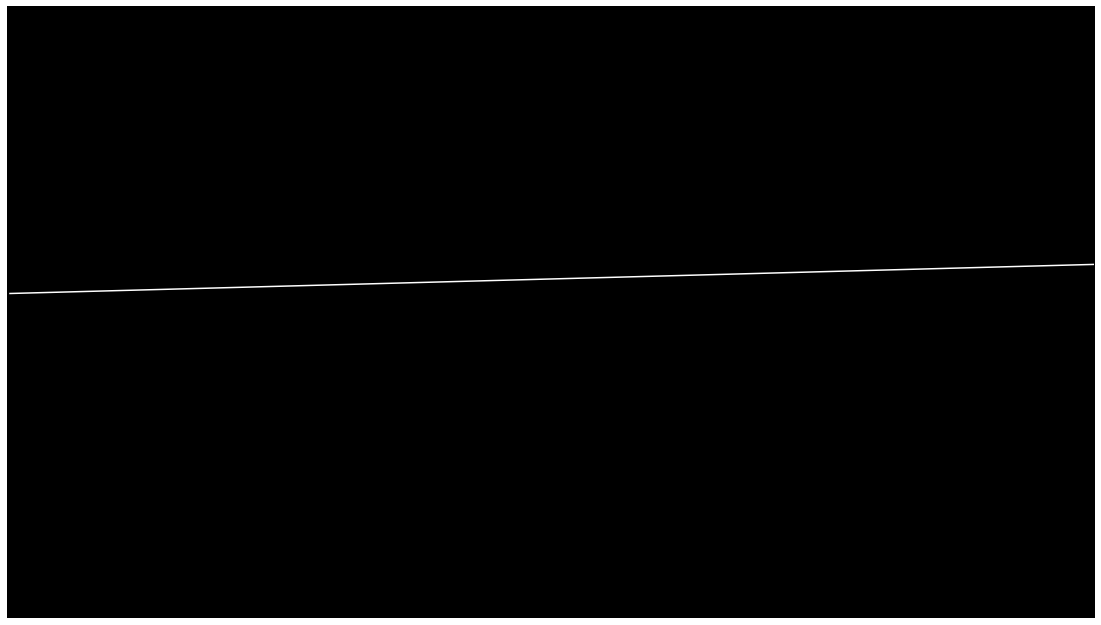

(array([[960.5]]), array([[476.74014407]]), array([[0.03283642]]), array([[0.99946074]]))


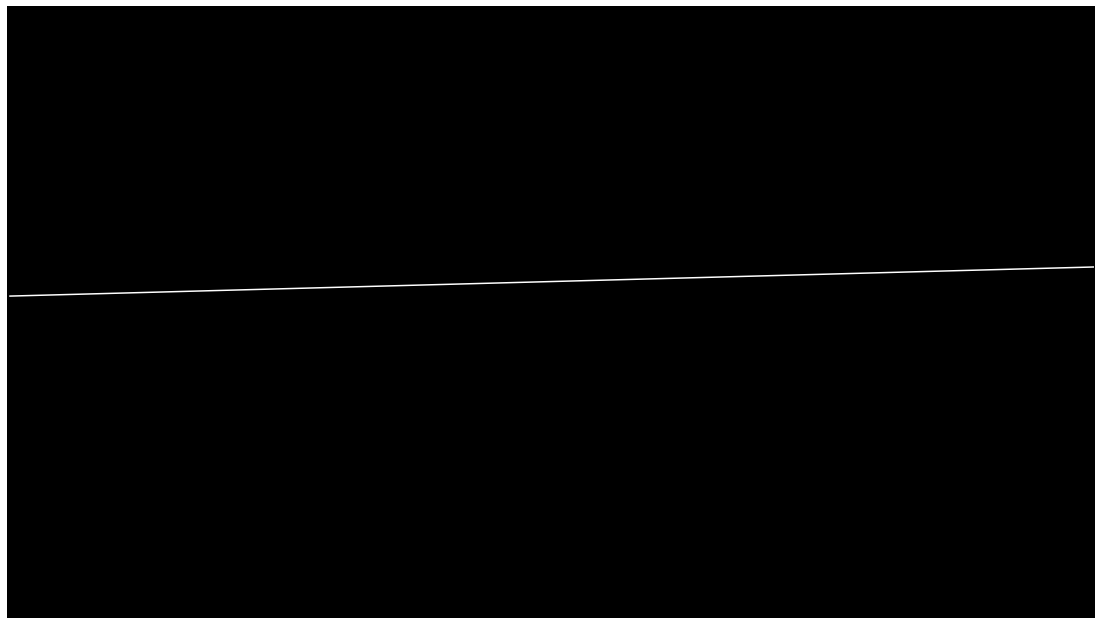

(array([[961]], dtype=uint16), array([[482.93766591]]), array([[0.03199233]]), array([[0.99948811]]))


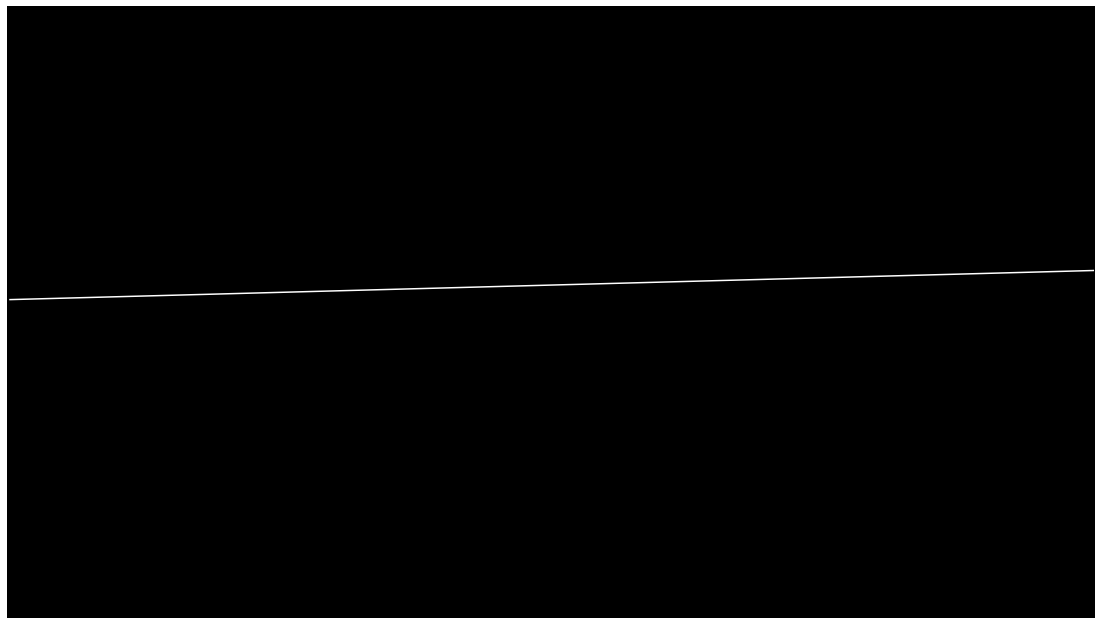

(array([[961]], dtype=uint16), array([[492.93643065]]), array([[0.0348995]]), array([[0.99939083]]))


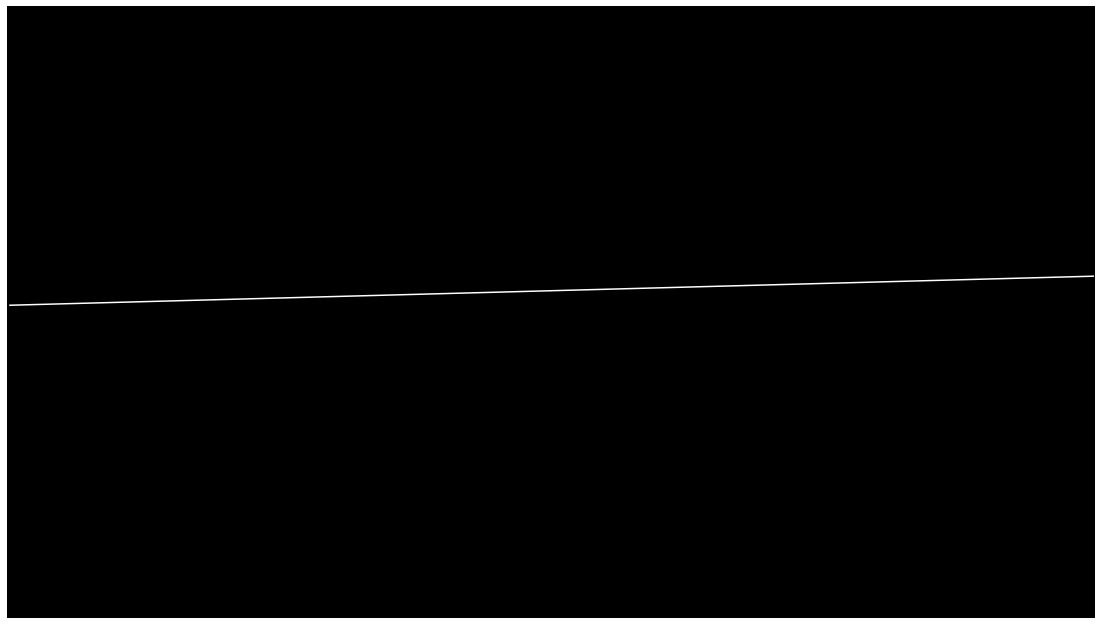

(array([[961]], dtype=uint16), array([[498.51125525]]), array([[0.0348995]]), array([[0.99939083]]))


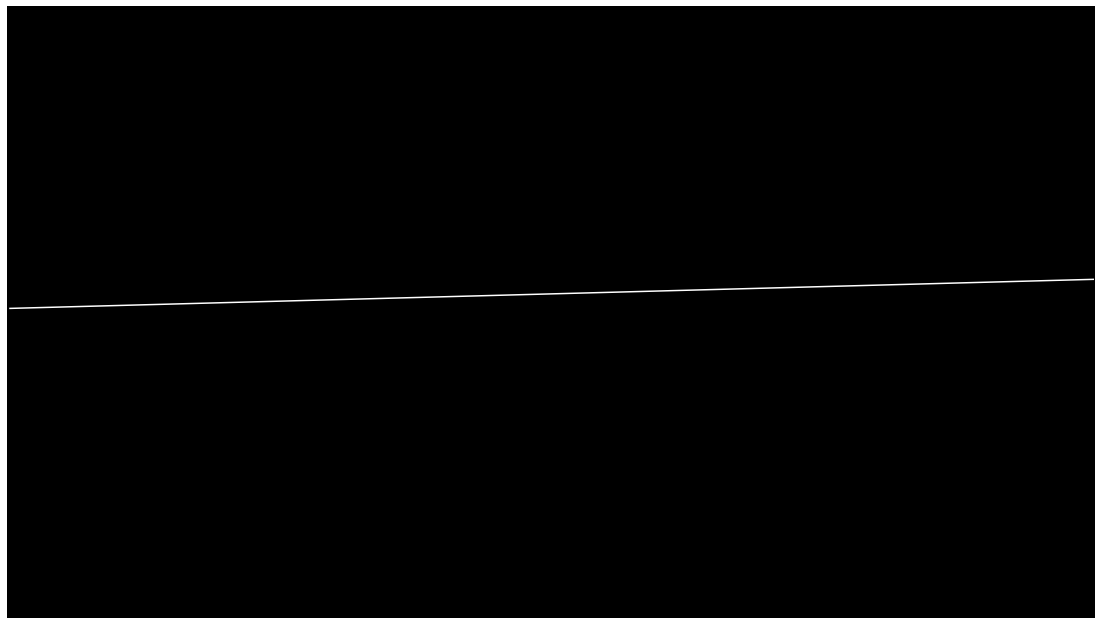

(array([[960.5]]), array([[503.29271519]]), array([[0.02913909]]), array([[0.99957537]]))


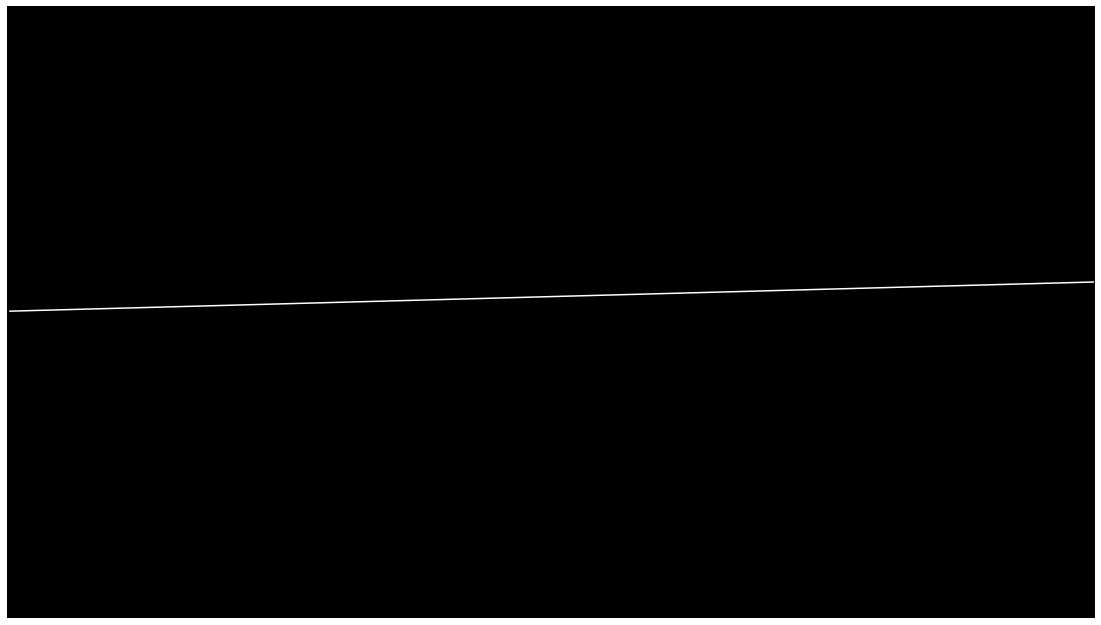

(array([[961]], dtype=uint16), array([[507.94557381]]), array([[0.0348995]]), array([[0.99939083]]))


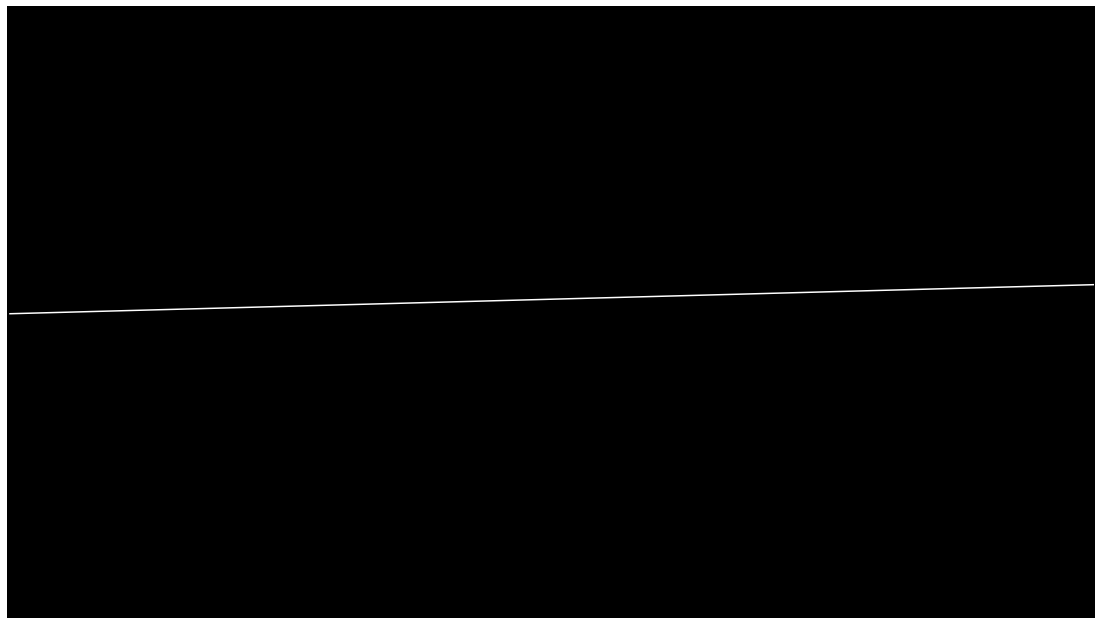

(array([[961]], dtype=uint16), array([[508.5173507]]), array([[0.0348995]]), array([[0.99939083]]))


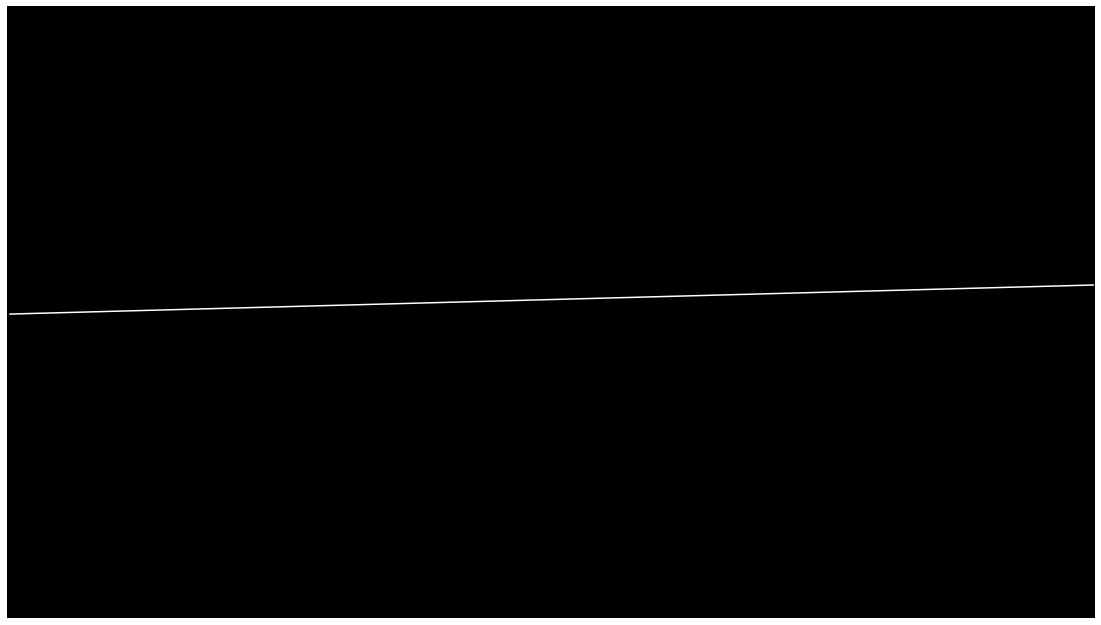

(array([[960.5]]), array([[508.27059625]]), array([[0.03111078]]), array([[0.99951594]]))


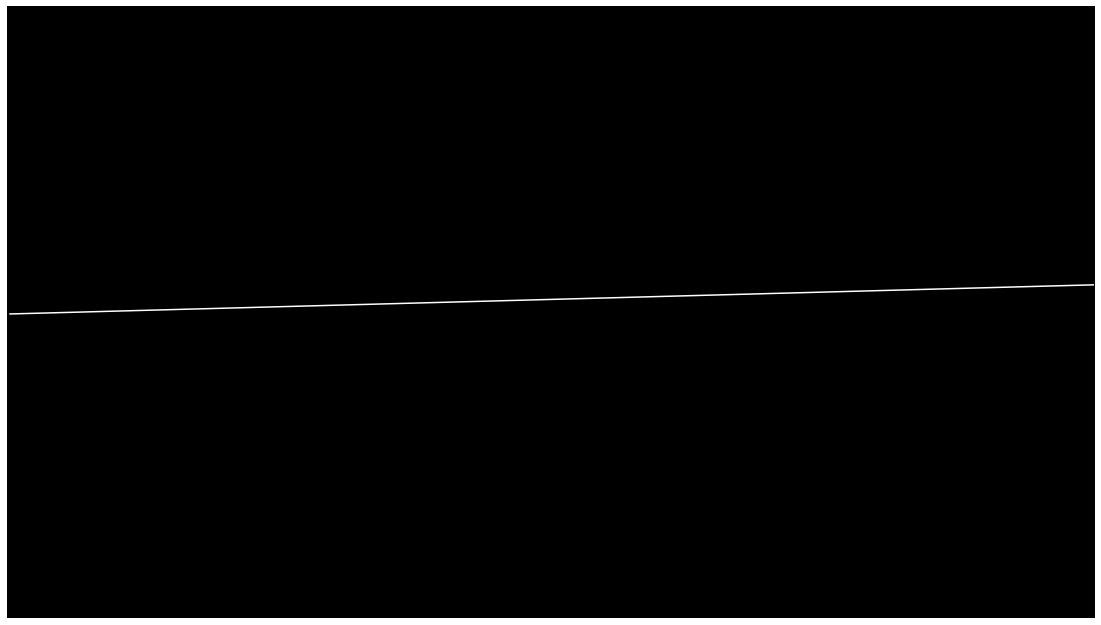

(array([[960.5]]), array([[508.66967994]]), array([[0.03016648]]), array([[0.99954489]]))


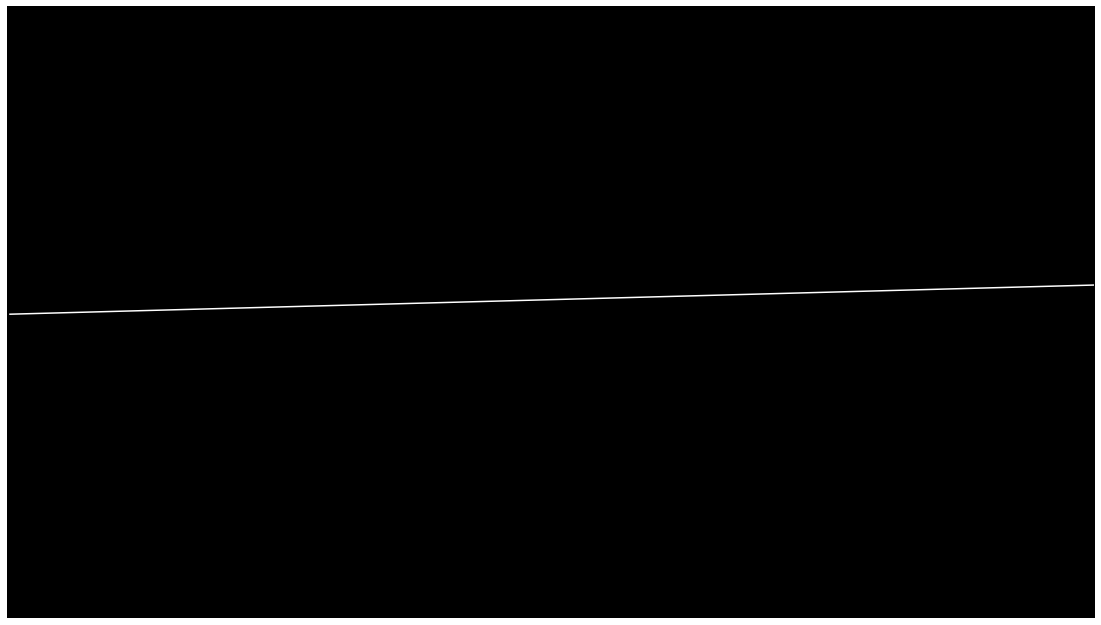

(array([[960.5]]), array([[510.69802455]]), array([[0.0284087]]), array([[0.99959639]]))


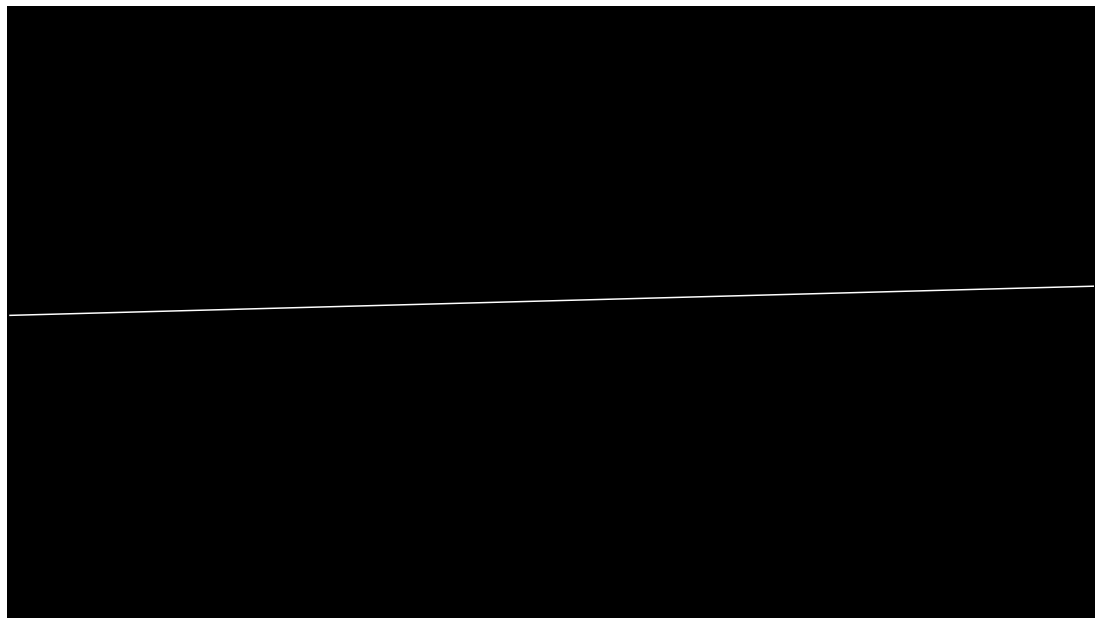

(array([[961]], dtype=uint16), array([[508.70806721]]), array([[0.02835785]]), array([[0.99959784]]))


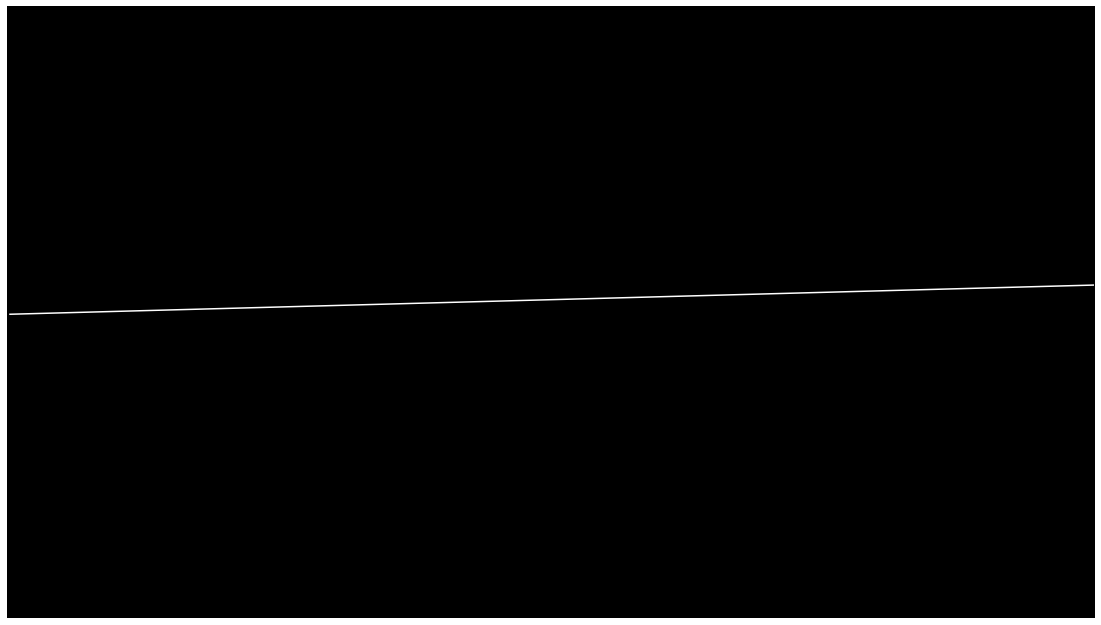

(array([[960.5]]), array([[506.9488216]]), array([[0.02993477]]), array([[0.99955185]]))


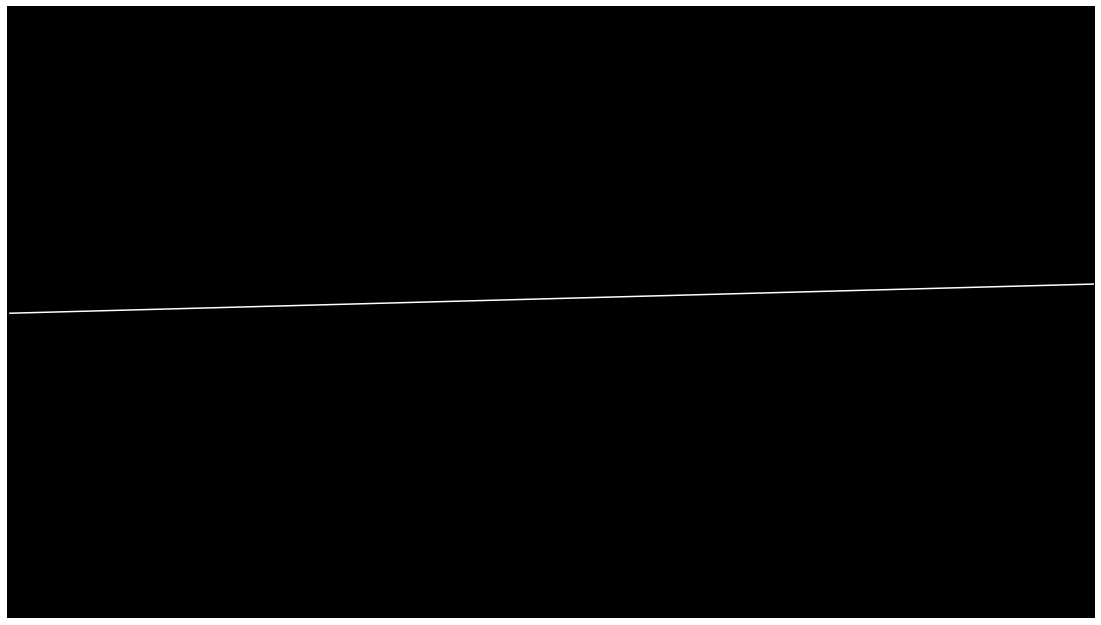

(array([[961]], dtype=uint16), array([[508.21200312]]), array([[0.02617695]]), array([[0.99965732]]))


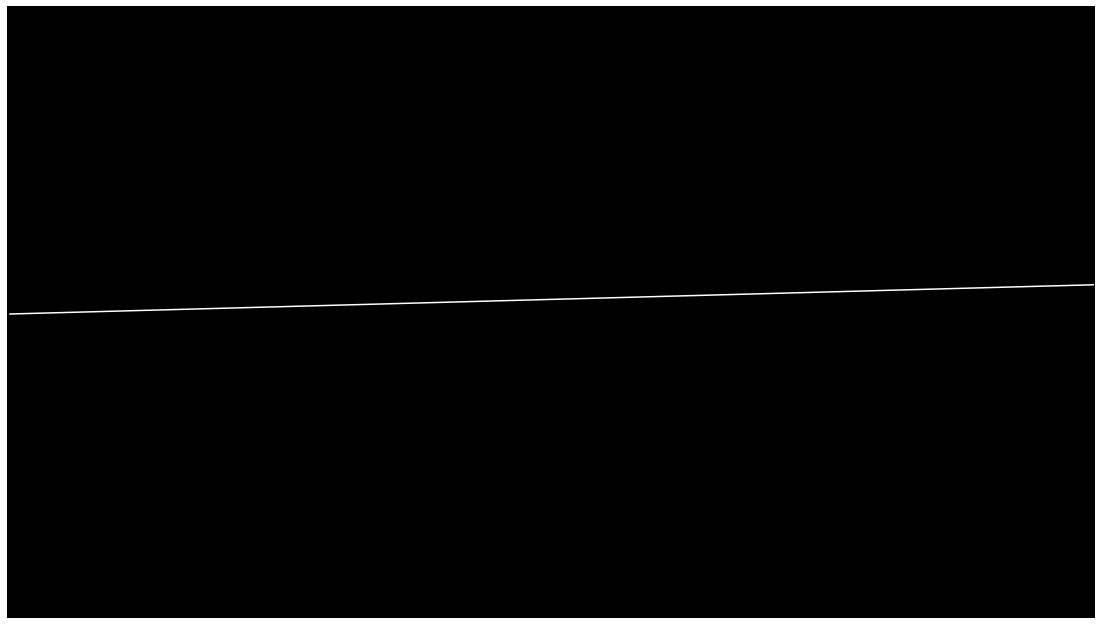

(array([[961]], dtype=uint16), array([[507.9565775]]), array([[0.02908478]]), array([[0.99957695]]))


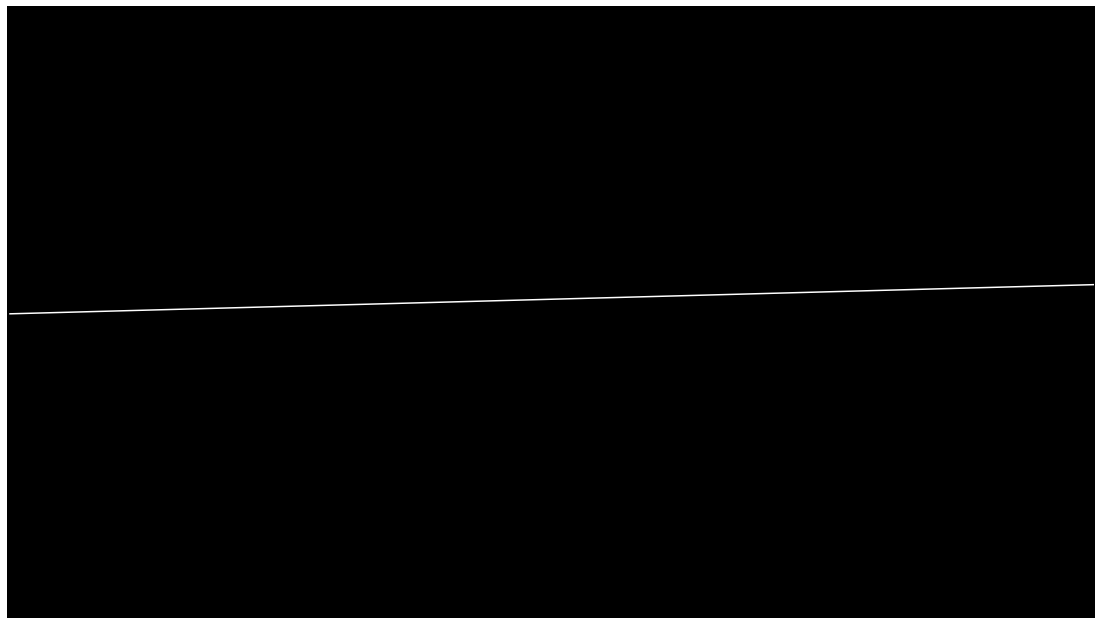

(array([[960.5]]), array([[507.94105133]]), array([[0.02482594]]), array([[0.99969179]]))


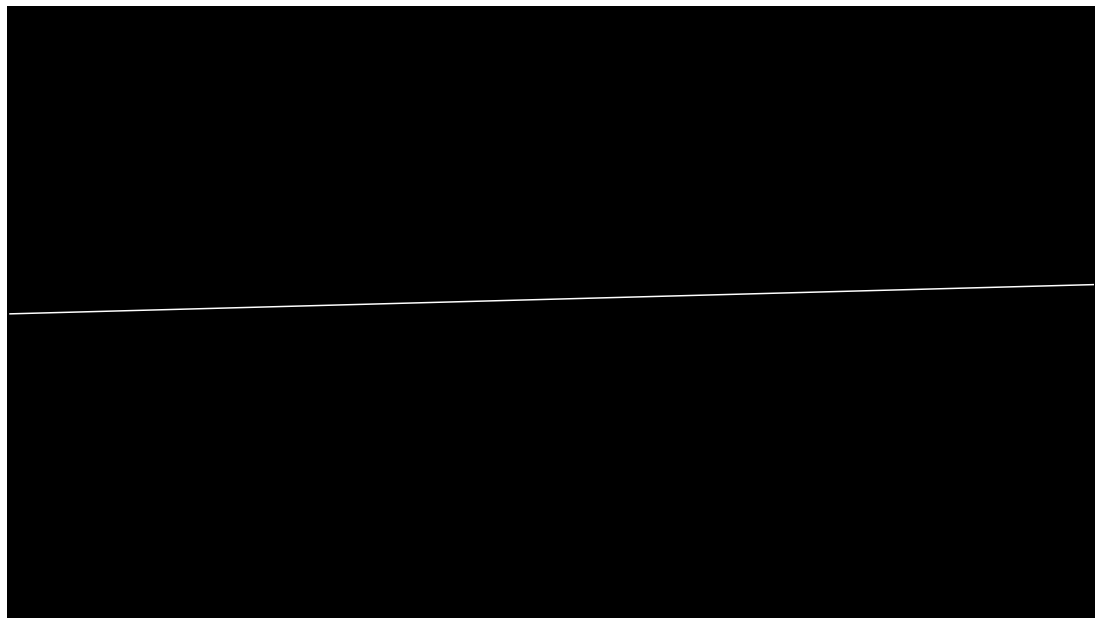

(array([[961]], dtype=uint16), array([[497.73779705]]), array([[0.02520762]]), array([[0.99968224]]))


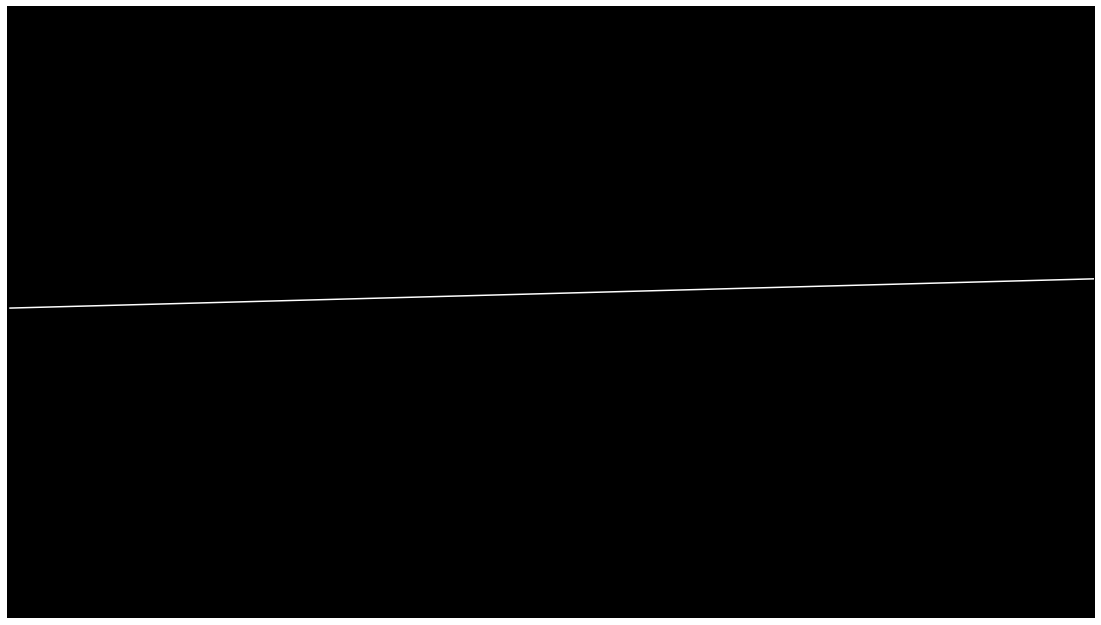

(array([[960.5]]), array([[490.26598041]]), array([[0.0275216]]), array([[0.99962121]]))


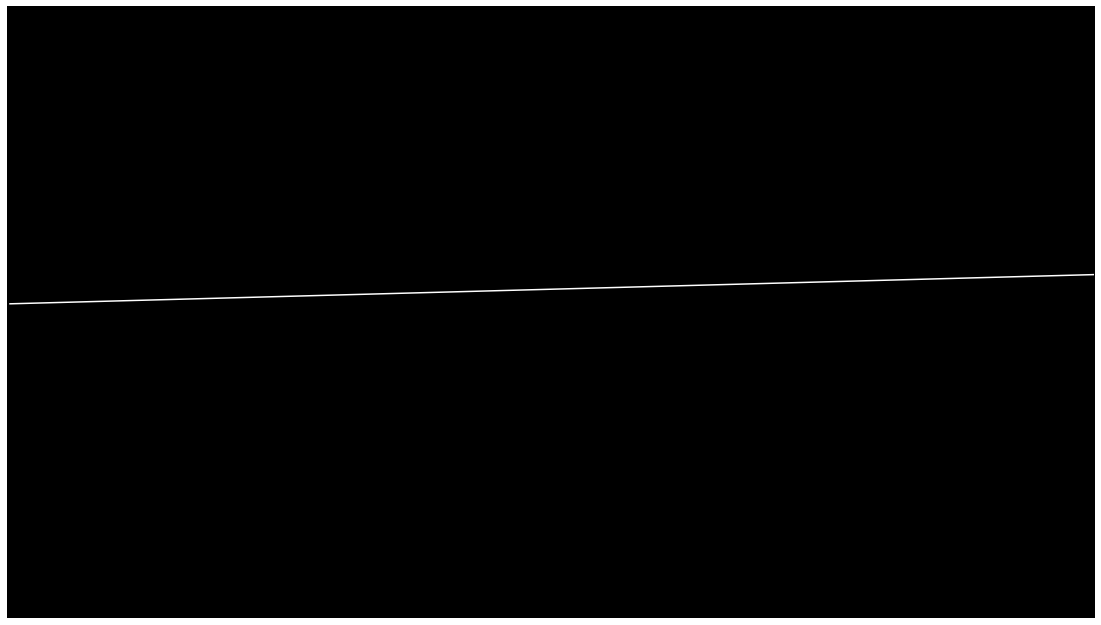

(array([[961]], dtype=uint16), array([[472.80210543]]), array([[0.0274232]]), array([[0.99962391]]))


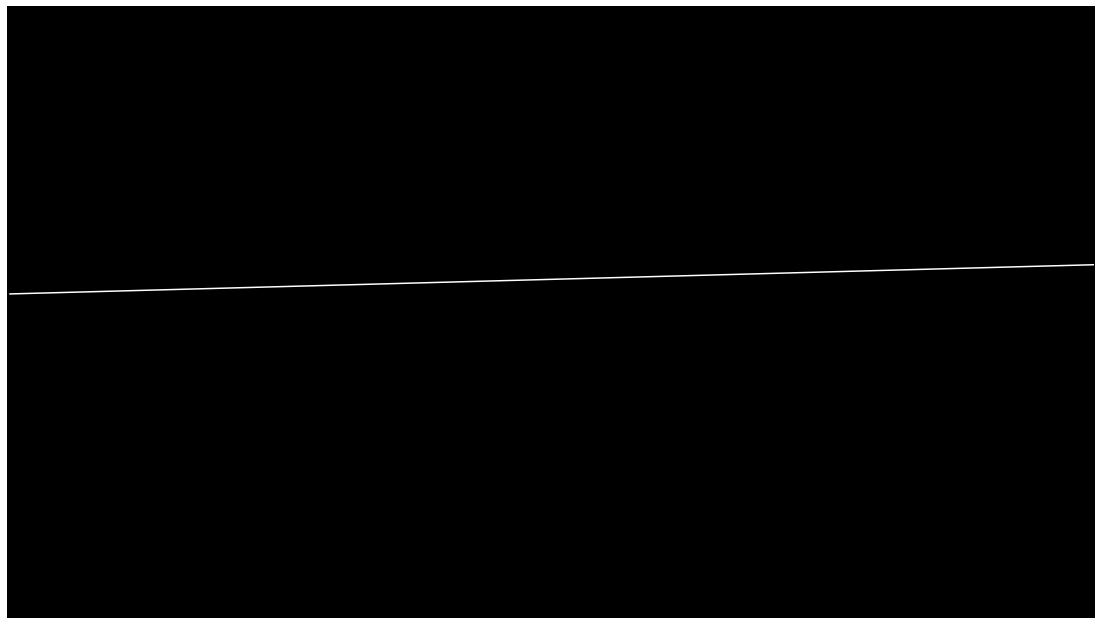

(array([[961]], dtype=uint16), array([[458.30343814]]), array([[0.01745241]]), array([[0.9998477]]))


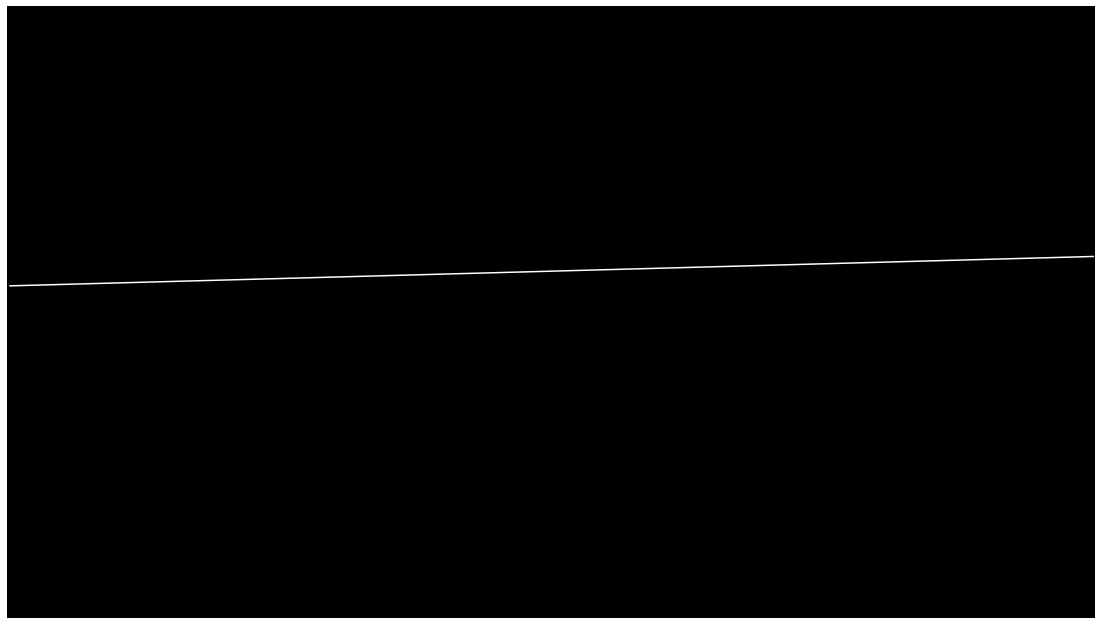

(array([[961]], dtype=uint16), array([[442.94731629]]), array([[0.02326889]]), array([[0.99972924]]))


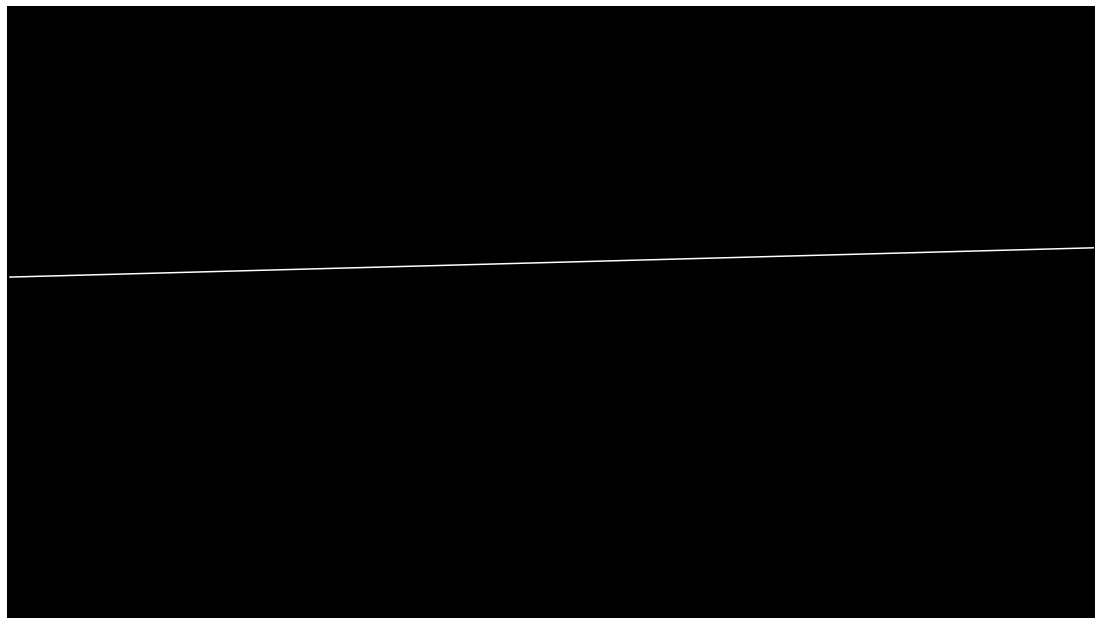

(array([[960.5]]), array([[433.49967054]]), array([[0.02554774]]), array([[0.9996736]]))


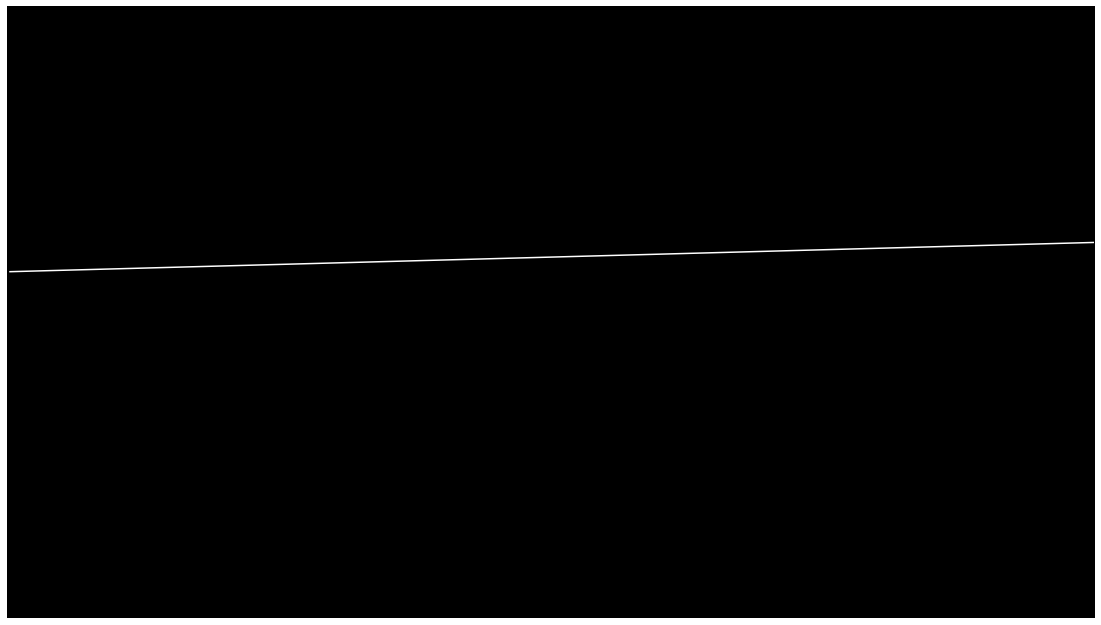

(array([[961]], dtype=uint16), array([[432.96624583]]), array([[0.01745241]]), array([[0.9998477]]))


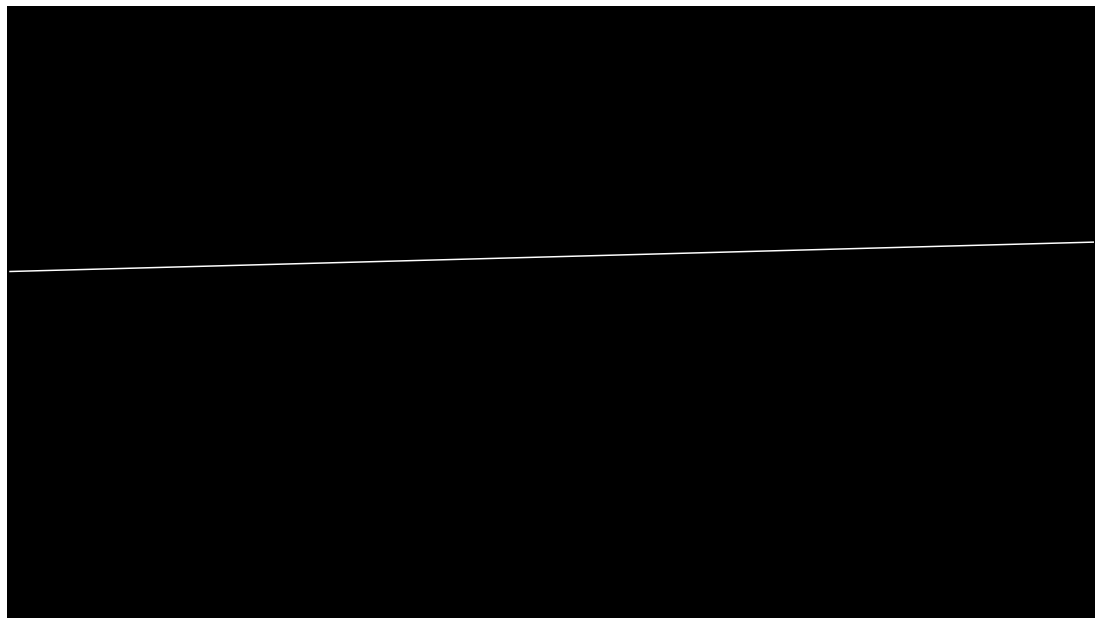

(array([[961]], dtype=uint16), array([[428.21552228]]), array([[0.01745241]]), array([[0.9998477]]))


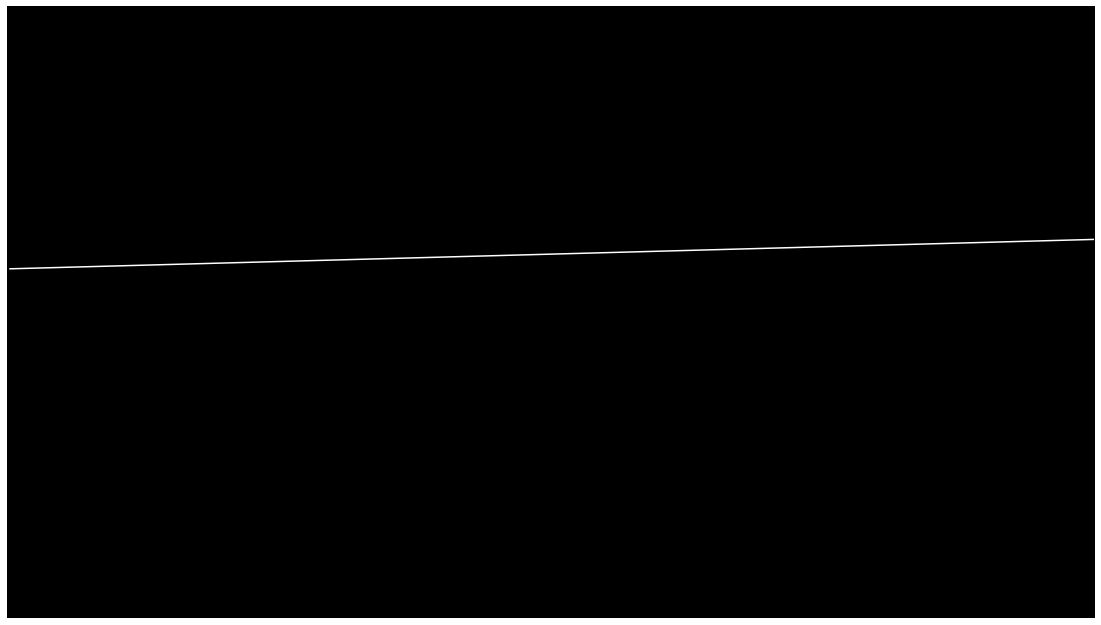

(array([[961]], dtype=uint16), array([[422.61943557]]), array([[0.02036069]]), array([[0.9997927]]))


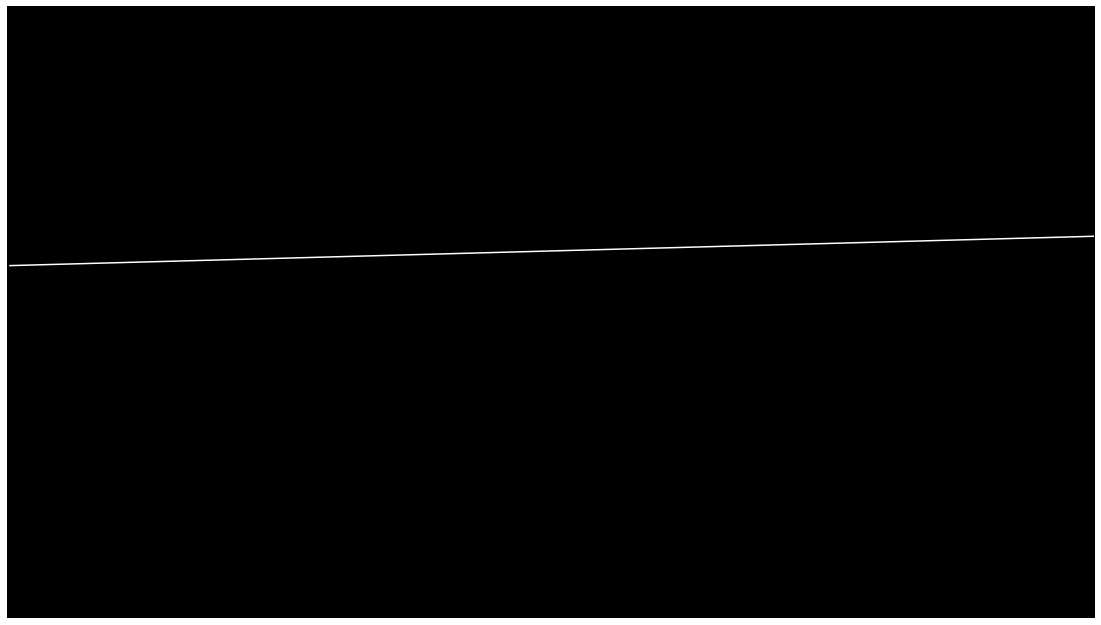

(array([[961]], dtype=uint16), array([[421.71428571]]), array([[6.123234e-17]]), array([[1]], dtype=uint8))


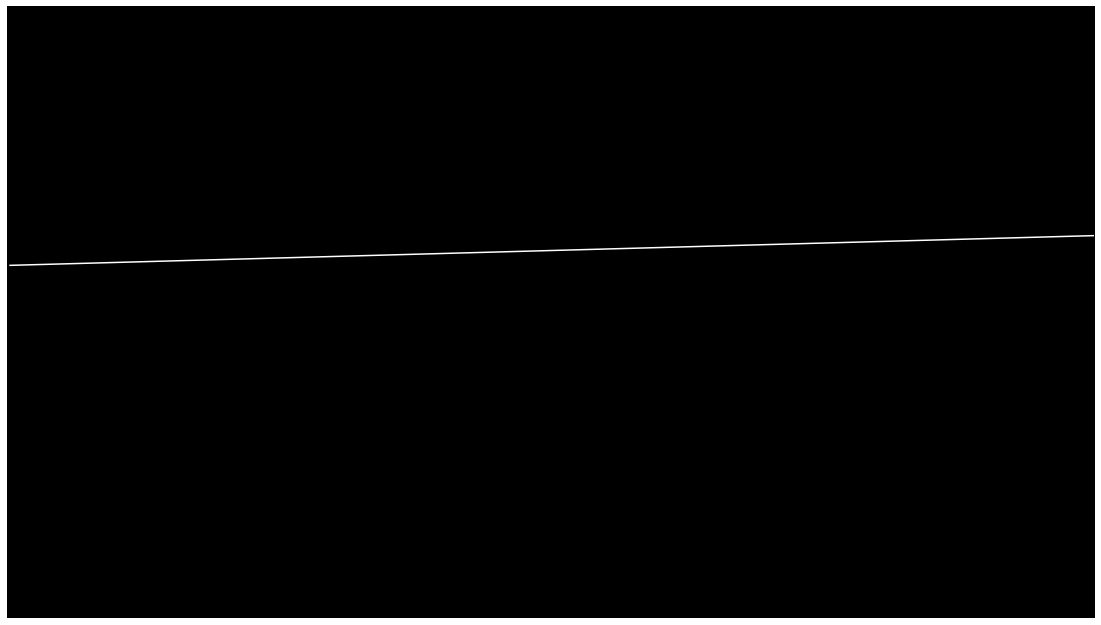

(array([[960.5]]), array([[425.98638132]]), array([[6.123234e-17]]), array([[1]], dtype=uint8))


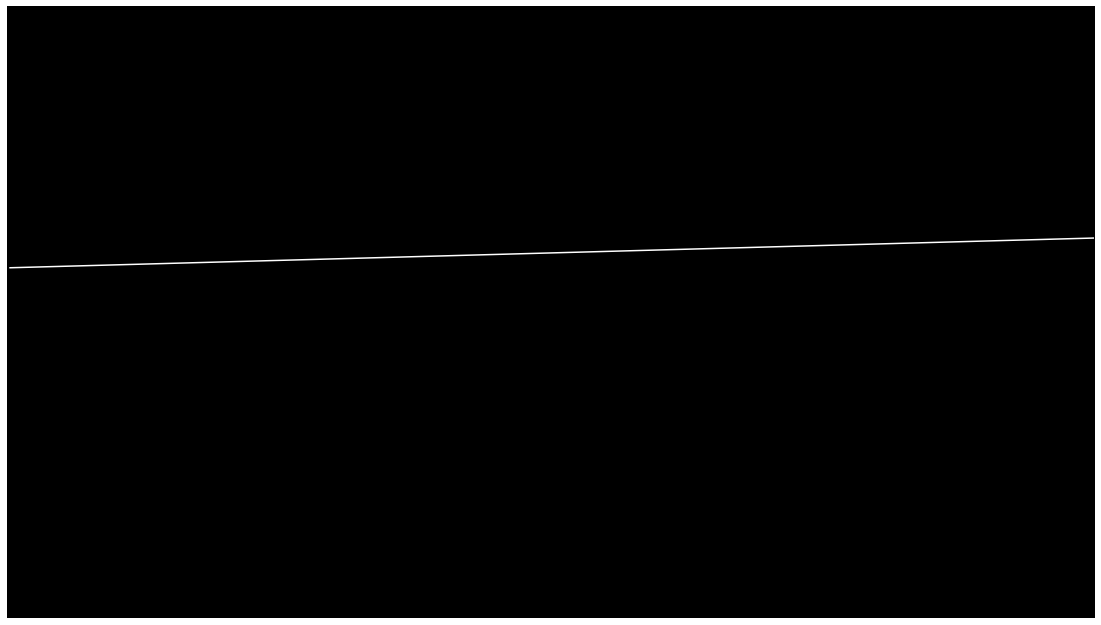

(array([[960.5]]), array([[466.36631141]]), array([[-0.00320374]]), array([[0.99999487]]))


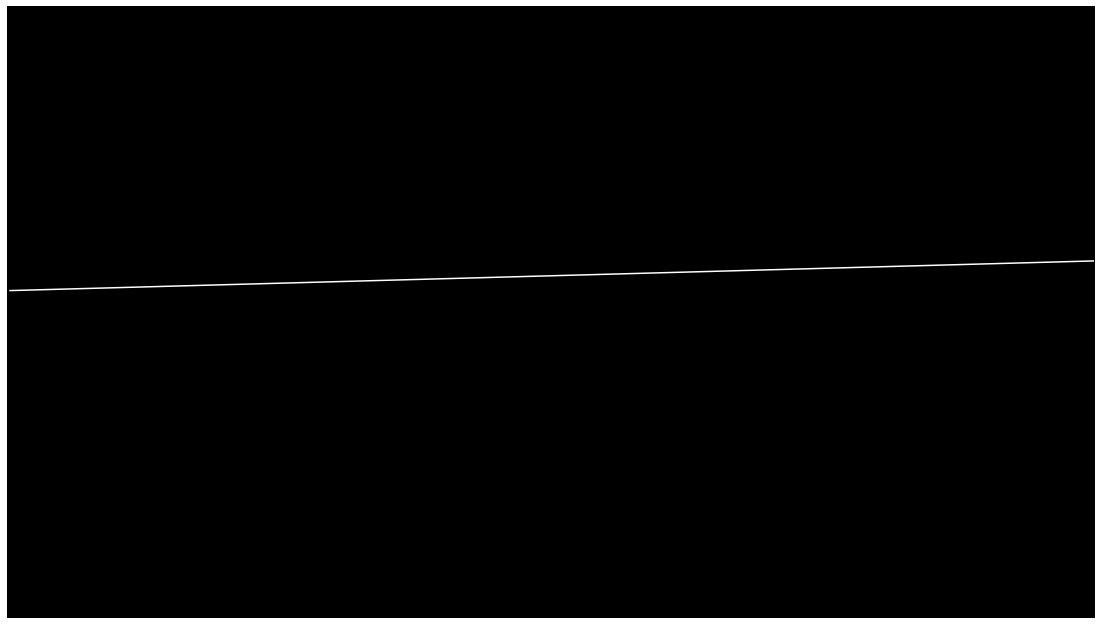

(array([[961]], dtype=uint16), array([[487.57456295]]), array([[0.01745241]]), array([[0.9998477]]))


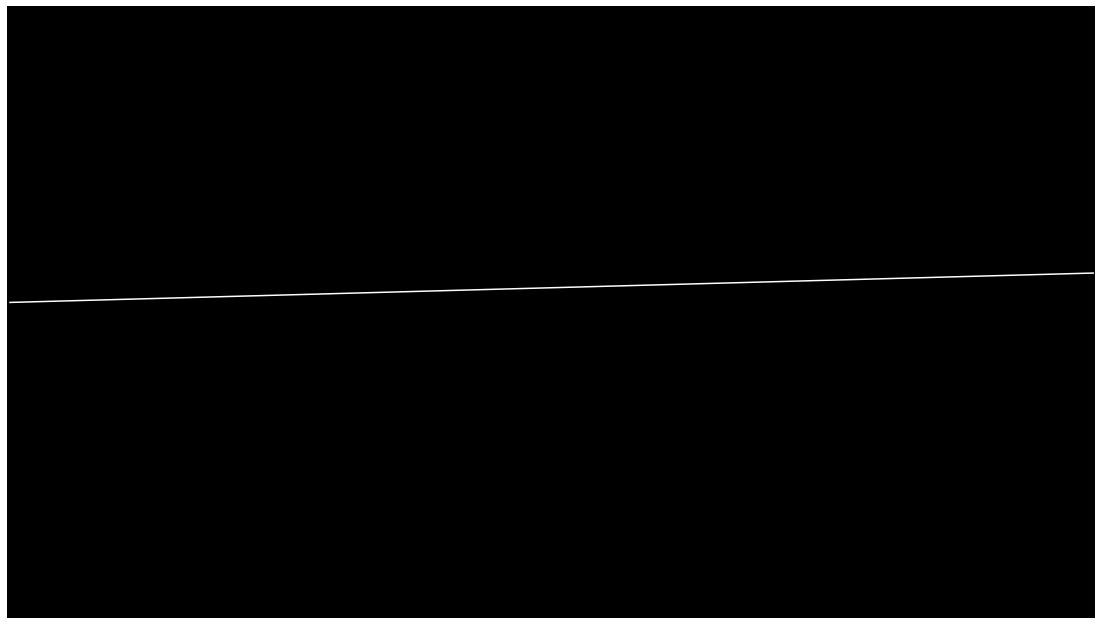

(array([[960.5]]), array([[493.76435462]]), array([[0.00411361]]), array([[0.99999154]]))


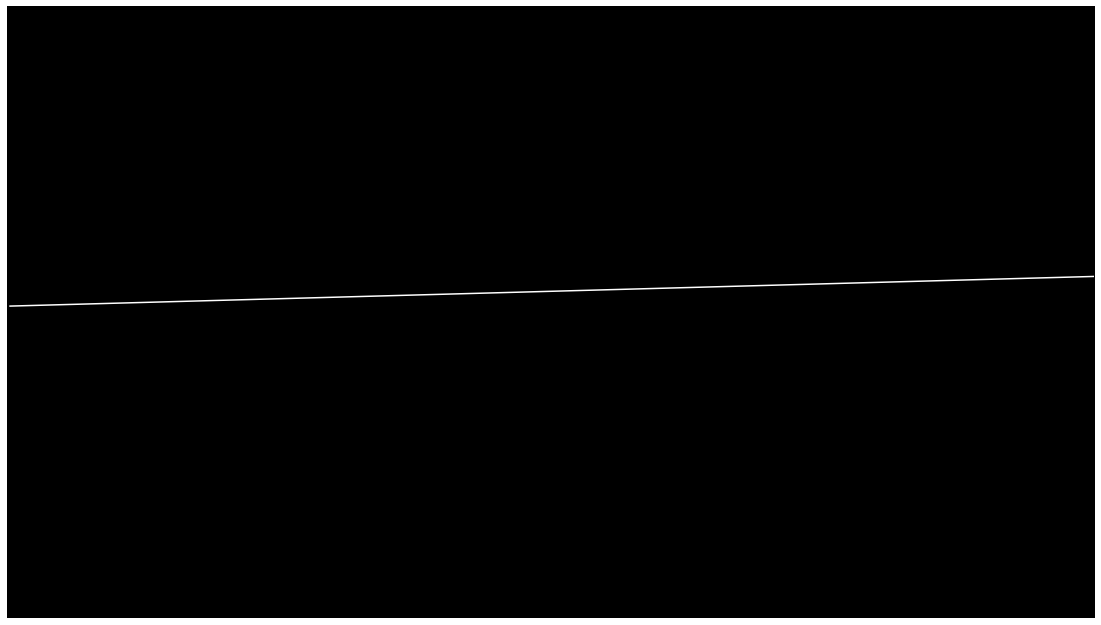

(array([[961]], dtype=uint16), array([[397]], dtype=uint16), array([[6.123234e-17]]), array([[1]], dtype=uint8))


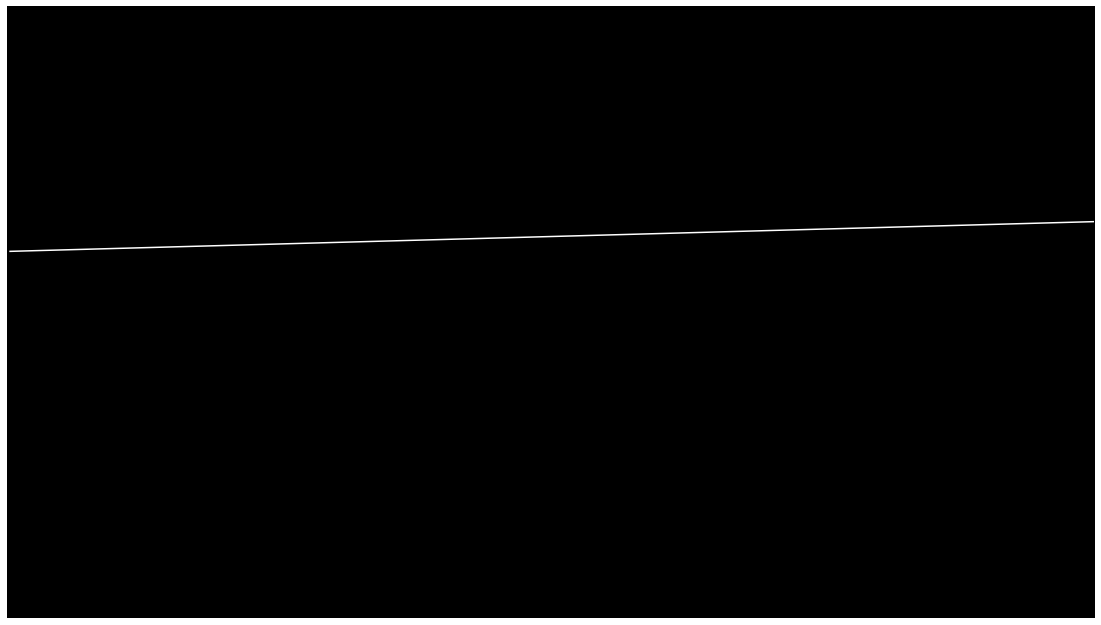

(array([[961]], dtype=uint16), array([[412]], dtype=uint16), array([[6.123234e-17]]), array([[1]], dtype=uint8))


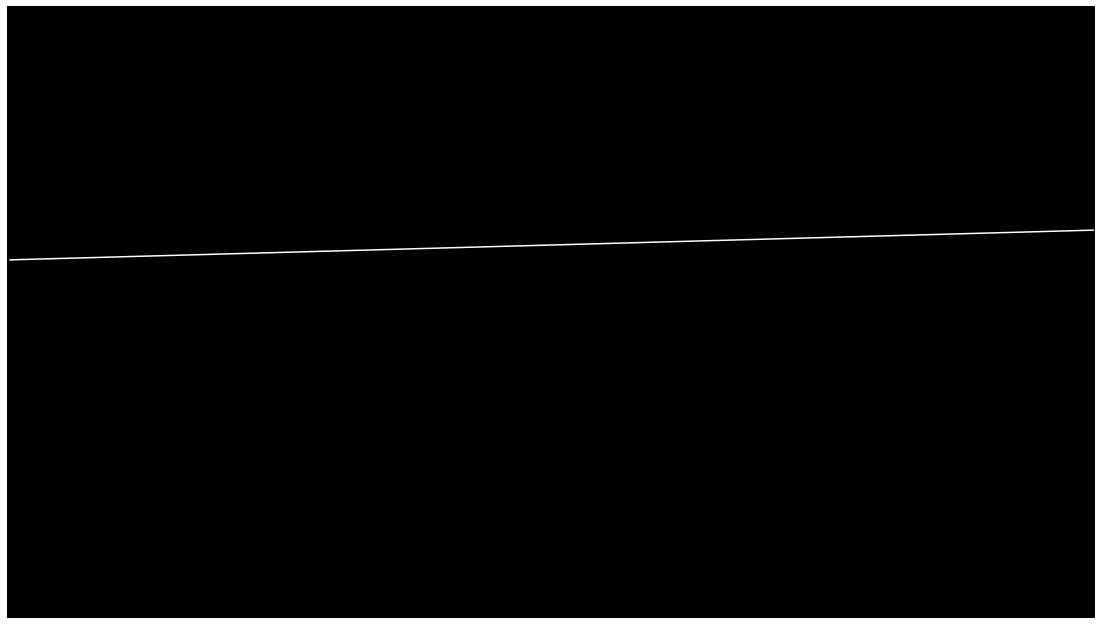

(array([[961]], dtype=uint16), array([[424.96502721]]), array([[0.01745241]]), array([[0.9998477]]))


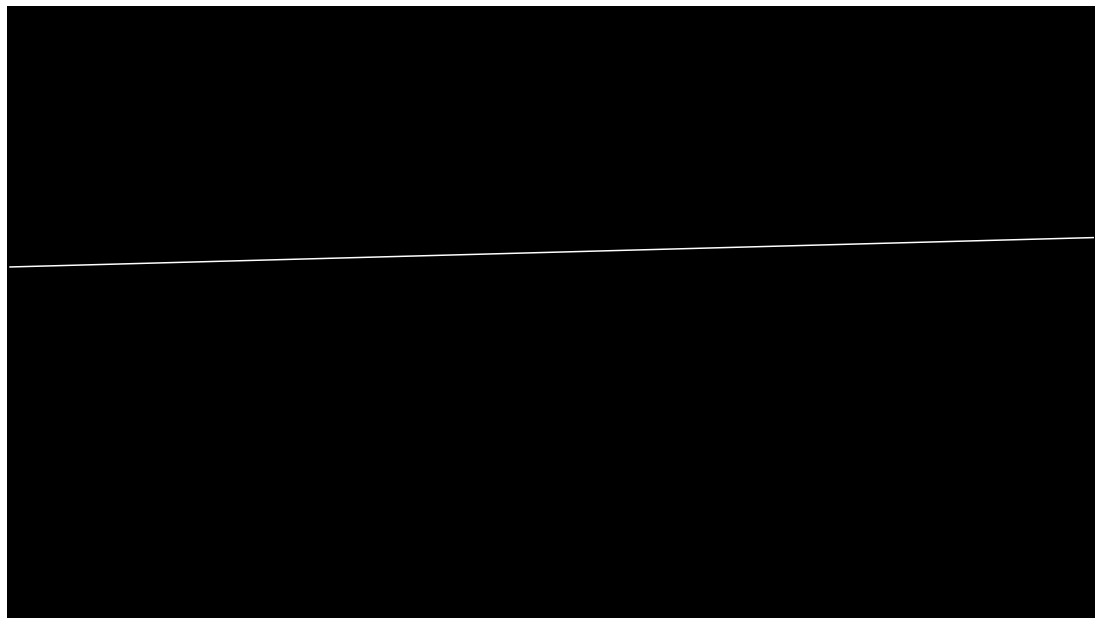

(array([[961]], dtype=uint16), array([[415.86722658]]), array([[0.00718655]]), array([[0.99997418]]))


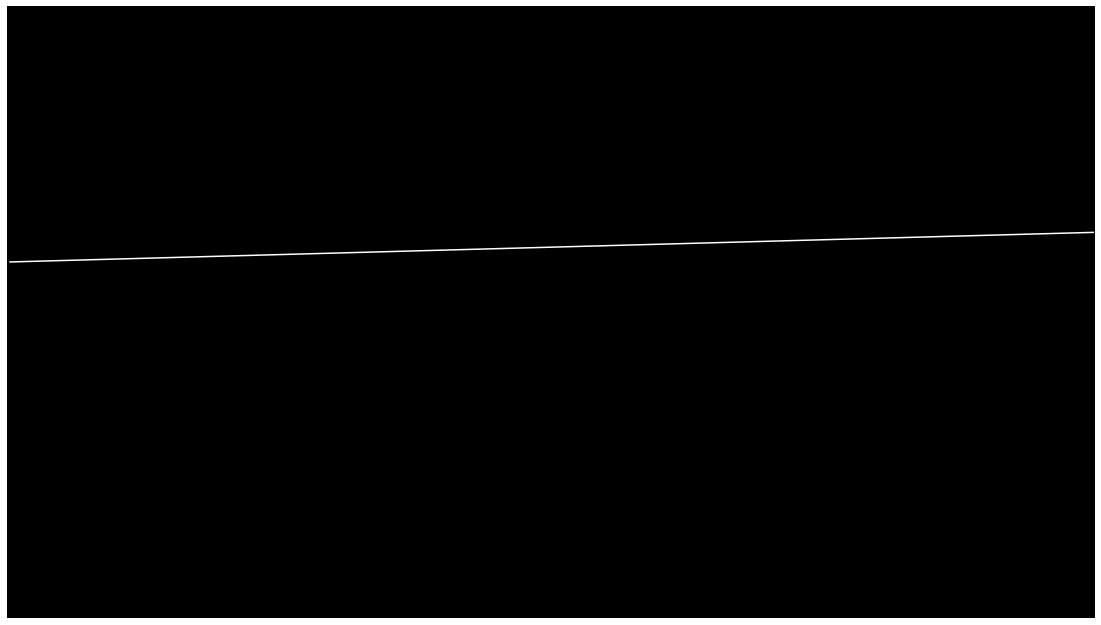

(array([[961]], dtype=uint16), array([[422.99985307]]), array([[-0.00698122]]), array([[0.99997563]]))


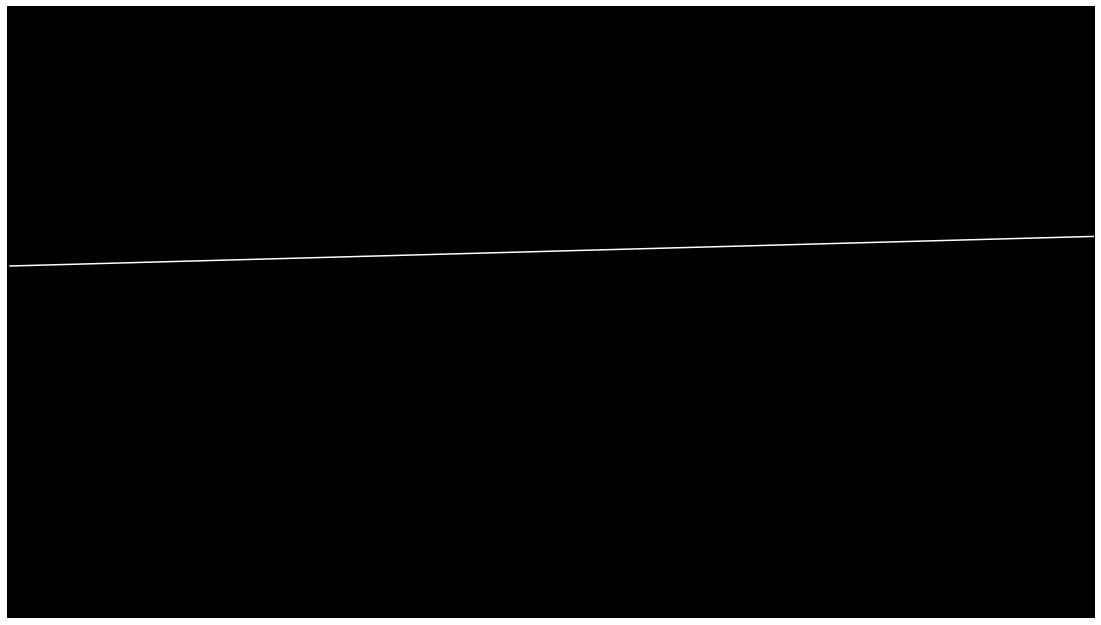

(array([[961]], dtype=uint16), array([[432.66678316]]), array([[-0.0029088]]), array([[0.99999577]]))


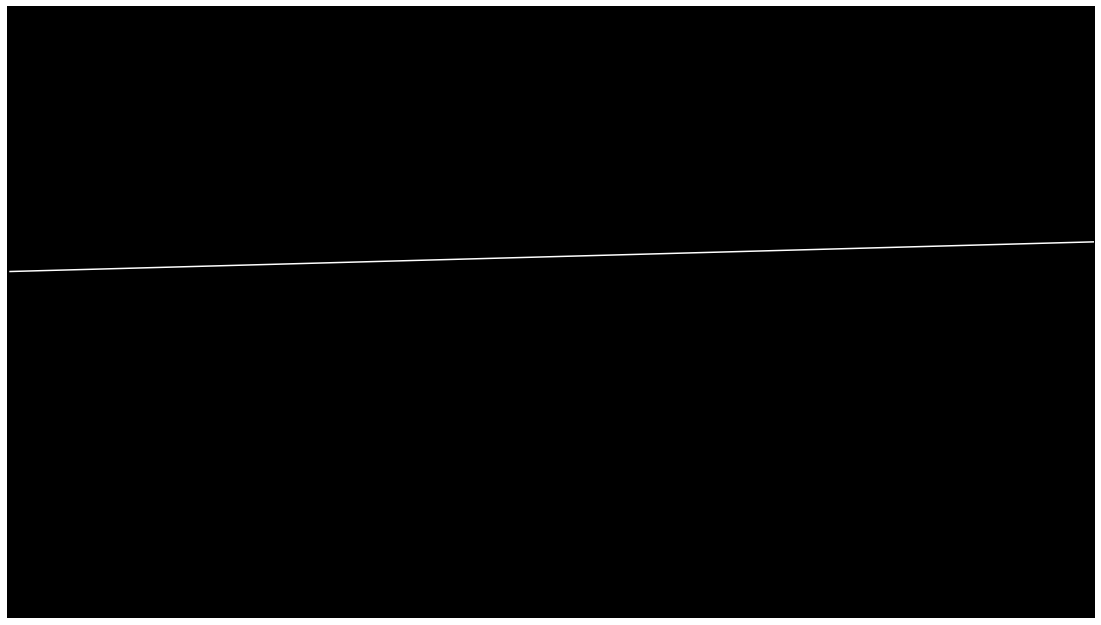

(array([[961]], dtype=uint16), array([[428.96563652]]), array([[0.01745241]]), array([[0.9998477]]))


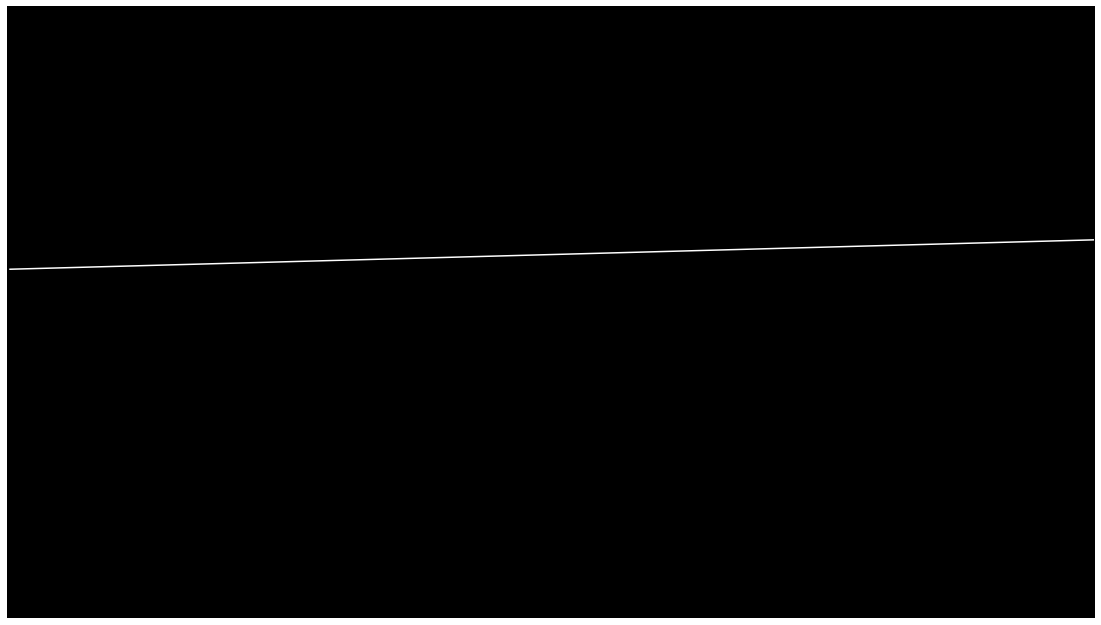

(array([[961]], dtype=uint16), array([[428.53699981]]), array([[0.01745241]]), array([[0.9998477]]))


KeyboardInterrupt: 

In [12]:
# Read de base image
im = np.array(Image.open("../VIS_Onboard/VIS_Onboard_frames/MVI_0790_VIS_OB_frame0.jpg"), dtype=np.uint8)

# Get image dimension
len_x, len_y = len(im), len(im[0])

# frame_number is used to control the frame number
frame_number = 0
# horizon = data frame <count> -> (x, y, cos alpha, sen alpha) - See Explanation of GT files
for horizon in data['structXML'][0]:
    print(horizon)
    # Create Gt matrix image
    gt = np.zeros((len_x, len_y), dtype=np.uint8)

    # Dimension in inches
    lenp_x, lenp_y = len_x * 0.0104166667, len_y * 0.0104166667
    # Create figure and axes
    fig,ax = plt.subplots(figsize=(lenp_y, lenp_x))

    # Display the image with gray scale
    ax.imshow(gt, cmap='gray')

    # Create horizon line
    line = plt.axhline(y=horizon[1], color='w', linestyle='-')

    # Convert coordinates
    ts = ax.transData
    coords = ts.transform((horizon[0][0][0], horizon[1][0][0]))

    # Rotate line
    # Rotate the line around x, y in alpha degrees
    t = mtransforms.Affine2D().rotate_deg_around(coords[0], coords[1], math.asin(horizon[3]))
    line.set_transform(line.get_transform() + t)

    # Disable axis print
    plt.axis("off")

    plt.show()

    # Save the image wihout padding
    fig.savefig('GT' + str(frame_number) + '.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)
    frame_number = frame_number + 1